In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import (logrank_test, pairwise_logrank_test,multivariate_logrank_test,survival_difference_at_fixed_point_in_time_test)

In [14]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
# Lire le fichier en sautant la première ligne
#df = pd.read_excel("/content/drive/MyDrive/GastricCancerData.xlsx", skiprows=1)
df = pd.read_excel("C:/Users/Sefdine/Documents/Memoire/Rappot Final/Correction/data/GastricCancerData.xlsx")
# Afficher les premières lignes du dataframe
df.head()

,AGE,SEXE,Cardiopathie,Ulceregastrique,Douleurepigastrique,Ulcerobourgeonnant,Constipation,Denitrution,Tabac,Mucineux,Tubuleux,Infiltrant,Stenosant,Metastases,Adenopathie,Traitement,Tempsdesuivi,Deces
0,65,F,NON,NON,OUI,NON,OUI,OUI,OUI,OUI,NON,OUI,OUI,OUI,OUI,Chirurgie_Exclusive,1,OUI
1,34,F,NON,NON,OUI,NON,OUI,NON,OUI,OUI,OUI,OUI,OUI,OUI,OUI,Chirurgie_Chimiotherapie,1,OUI
2,55,H,NON,NON,OUI,NON,OUI,NON,OUI,OUI,NON,OUI,NON,OUI,OUI,Chirurgie_Exclusive,1,OUI
3,60,F,OUI,OUI,OUI,NON,OUI,NON,OUI,OUI,OUI,OUI,NON,OUI,NON,Chirurgie_Exclusive,2,NON
4,65,H,OUI,NON,OUI,NON,OUI,NON,OUI,NON,NON,OUI,OUI,NON,OUI,Chirurgie_Chimiotherapie,2,OUI


In [16]:
#affichage des dimensions
df.shape

(337, 18)

In [17]:
#Types de variables de la base
df.dtypes

AGE                     int64
SEXE                   object
Cardiopathie           object
Ulceregastrique        object
Douleurepigastrique    object
Ulcerobourgeonnant     object
Constipation           object
Denitrution            object
Tabac                  object
Mucineux               object
Tubuleux               object
Infiltrant             object
Stenosant              object
Metastases             object
Adenopathie            object
Traitement             object
Tempsdesuivi            int64
Deces                  object
dtype: object

In [18]:
#Nombre de types de variables de la base
df.dtypes.value_counts()

object    16
int64      2
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  337 non-null    int64 
 1   SEXE                 337 non-null    object
 2   Cardiopathie         337 non-null    object
 3   Ulceregastrique      337 non-null    object
 4   Douleurepigastrique  337 non-null    object
 5   Ulcerobourgeonnant   337 non-null    object
 6   Constipation         337 non-null    object
 7   Denitrution          337 non-null    object
 8   Tabac                337 non-null    object
 9   Mucineux             337 non-null    object
 10  Tubuleux             337 non-null    object
 11  Infiltrant           337 non-null    object
 12  Stenosant            337 non-null    object
 13  Metastases           337 non-null    object
 14  Adenopathie          337 non-null    object
 15  Traitement           337 non-null    object
 16  Tempsdes

In [20]:
#Nombres de valeurs/modalités uniques de chaque variable
df.nunique()

AGE                    33
SEXE                    2
Cardiopathie            2
Ulceregastrique         2
Douleurepigastrique     2
Ulcerobourgeonnant      2
Constipation            2
Denitrution             2
Tabac                   2
Mucineux                2
Tubuleux                2
Infiltrant              2
Stenosant               2
Metastases              2
Adenopathie             2
Traitement              2
Tempsdesuivi           48
Deces                   2
dtype: int64

In [21]:
#Données manquantes
##1ere méthode
df.isna().sum()

AGE                    0
SEXE                   0
Cardiopathie           0
Ulceregastrique        0
Douleurepigastrique    0
Ulcerobourgeonnant     0
Constipation           0
Denitrution            0
Tabac                  0
Mucineux               0
Tubuleux               0
Infiltrant             0
Stenosant              0
Metastases             0
Adenopathie            0
Traitement             0
Tempsdesuivi           0
Deces                  0
dtype: int64

In [22]:
#Pourcentages de données manquantes
df.isna().sum()/df.shape[0]*100

AGE                    0.0
SEXE                   0.0
Cardiopathie           0.0
Ulceregastrique        0.0
Douleurepigastrique    0.0
Ulcerobourgeonnant     0.0
Constipation           0.0
Denitrution            0.0
Tabac                  0.0
Mucineux               0.0
Tubuleux               0.0
Infiltrant             0.0
Stenosant              0.0
Metastases             0.0
Adenopathie            0.0
Traitement             0.0
Tempsdesuivi           0.0
Deces                  0.0
dtype: float64

In [23]:
#Données dupliquées
df.duplicated().sum()

1

## **Analyse Fond**
### **Listes de variables quanti/quali**

In [24]:
#variables quantitatives
numCols = df.select_dtypes(exclude=['object']).columns
numCols

Index(['AGE', 'Tempsdesuivi'], dtype='object')

In [25]:
#variables qualitatives
catCols = df.select_dtypes(include=['object']).columns
catCols

Index(['SEXE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique',
       'Ulcerobourgeonnant', 'Constipation', 'Denitrution', 'Tabac',
       'Mucineux', 'Tubuleux', 'Infiltrant', 'Stenosant', 'Metastases',
       'Adenopathie', 'Traitement', 'Deces'],
      dtype='object')

### **Analyse Univariée**

In [26]:
#Statistiques descriptives des variables quantitatives
df[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,337.0,52.142433,9.852961,31.0,45.0,51.0,60.0,81.0
Tempsdesuivi,337.0,28.961424,23.909832,1.0,7.0,21.0,60.0,60.0


In [27]:
#Statistiques descriptives des variables qualitatives
df[catCols].describe().T

,count,unique,top,freq
SEXE,337,2,H,181
Cardiopathie,337,2,NON,228
Ulceregastrique,337,2,NON,208
Douleurepigastrique,337,2,OUI,293
Ulcerobourgeonnant,337,2,NON,224
Constipation,337,2,OUI,176
Denitrution,337,2,NON,221
Tabac,337,2,OUI,182
Mucineux,337,2,OUI,219
Tubuleux,337,2,OUI,243


In [28]:
#Autre méthode
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGE,337.0,NaN,NaN,NaN,52.142433,9.852961,31.0,45.0,51.0,60.0,81.0
SEXE,337,2,H,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cardiopathie,337,2,NON,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ulceregastrique,337,2,NON,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Douleurepigastrique,337,2,OUI,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ulcerobourgeonnant,337,2,NON,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Constipation,337,2,OUI,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denitrution,337,2,NON,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tabac,337,2,OUI,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mucineux,337,2,OUI,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Fréquence des modalité de la Variable cible deces (Nombre)
df["Deces"].value_counts()

Deces
OUI    223
NON    114
Name: count, dtype: int64

In [30]:
#Fréquence des modalité de la Variable cible deces (Pourcentage)
df["Deces"].value_counts(normalize = True)*100

Deces
OUI    66.172107
NON    33.827893
Name: proportion, dtype: float64

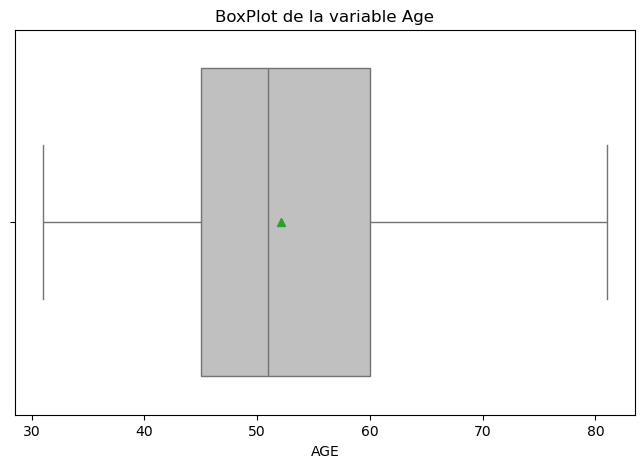

In [31]:
#boxplot de la variable age
plt.figure(figsize = (8,5))
sns.boxplot(data = df , x = "AGE", showmeans = True, color = "silver")
plt.title("BoxPlot de la variable Age")
plt.show()

<Figure size 800x500 with 0 Axes>

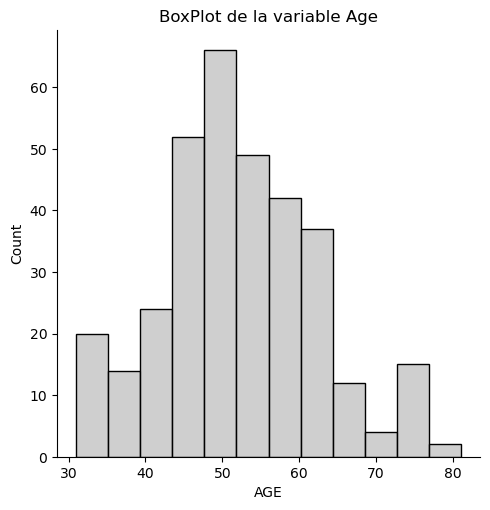

In [32]:
#Histogramme de la variable Age
plt.figure(figsize = (8,5))
sns.displot(data = df, x = "AGE" , color = "silver")
plt.title("BoxPlot de la variable Age")
plt.show()

### **Analyse Multivariée**

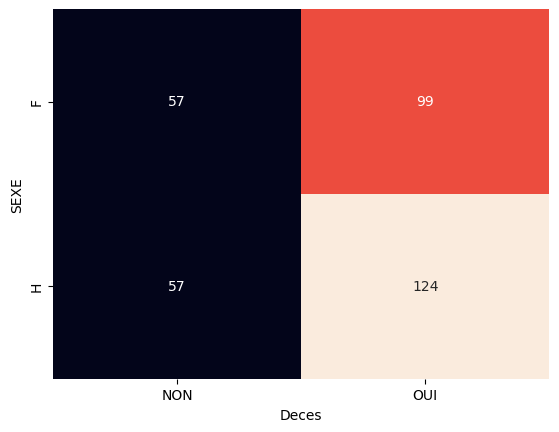

In [33]:
#Tableau croisé des variables Sex et Pclass
tableau = pd.crosstab(df["SEXE"] , df["Deces"]) 
sns.heatmap(tableau , annot = True, fmt = "d", cbar = False)
plt.show()

In [34]:
# Age et Sexe
df.groupby("SEXE")[["AGE"]].mean()

,AGE
SEXE,
F,54.256410
H,50.320442


In [35]:
# Age et Sexe
df.groupby("SEXE")[["AGE"]].count()

,AGE
SEXE,
F,156
H,181


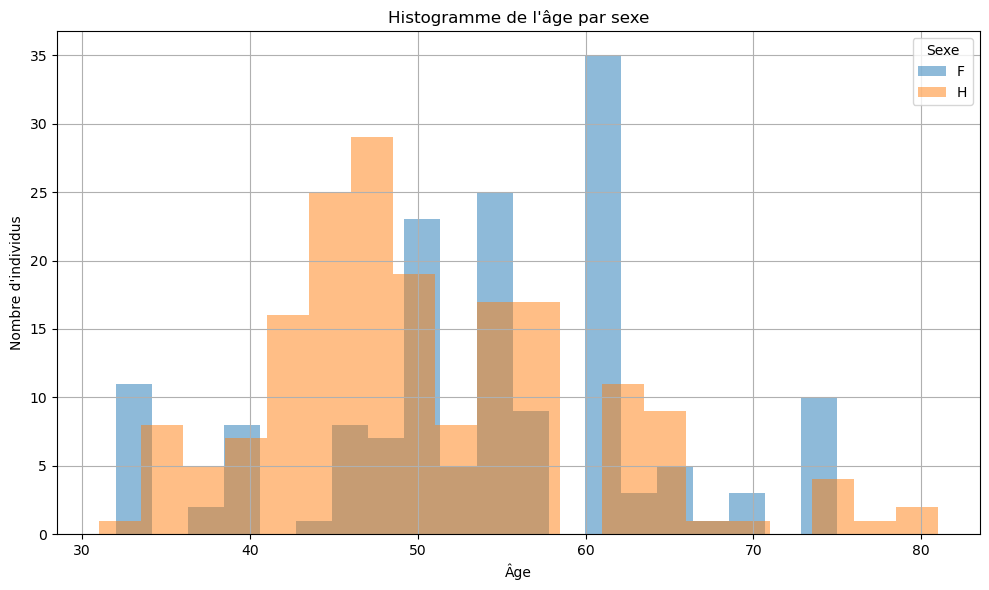

In [36]:
# Création de l'histogramme (comparaison des âges par sexe)
plt.figure(figsize=(10, 6))
# Histogramme pour chaque sexe
for sexe in df['SEXE'].unique():
    subset = df[df['SEXE'] == sexe]
    plt.hist(subset['AGE'], bins=20, alpha=0.5, label=str(sexe))

plt.title("Histogramme de l'âge par sexe")
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.legend(title="Sexe")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Créer des classes d'âge (tranches de 10 ans)
bins = [30, 40, 50, 60, 70, 81]
labels = ['31-40', '41-50', '51-60', '61-70', '71-81']
df['classe_age'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

# Tableau croisé entre classes d'âge et sexe
tableau = pd.crosstab(df['classe_age'], df['SEXE'])
tableau

SEXE,F,H
classe_age,,
31-40,21,21
41-50,34,89
51-60,60,42
61-70,31,22
71-81,10,7


In [38]:
import pandas as pd
# Création des classes d'âge : de 31 à 81, par tranche de 10 ans
bins = [30, 40, 50, 60, 70, 81]  # bornes de classes
labels = ['31-40', '41-50', '51-60', '61-70', '71-81']
df['classe_age'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

# Effectif de chaque classe d'âge selon le sexe
effectif_par_sexe = pd.crosstab(df['classe_age'], df['SEXE'])
# Effectif total par classe d'âge
effectif_total = df['classe_age'].value_counts().sort_index()

# Pourcentage de chaque classe d'âge
pourcentage = (effectif_total / effectif_total.sum()) * 100

# Résumé final dans un seul DataFrame
resultat = effectif_par_sexe.copy()
resultat['Total'] = effectif_total
resultat['%'] = pourcentage.round(2)

# Affichage
print(resultat)

SEXE         F   H  Total      %
classe_age                      
31-40       21  21     42  12.46
41-50       34  89    123  36.50
51-60       60  42    102  30.27
61-70       31  22     53  15.73
71-81       10   7     17   5.04


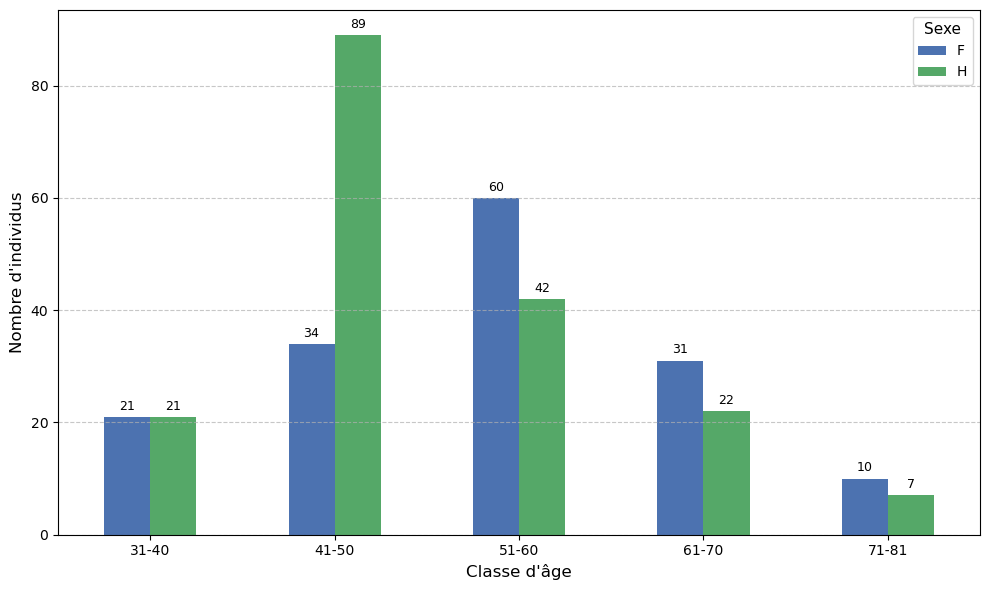

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Palette sobre
couleurs_pro = ['#4C72B0', '#55A868']  # Bleu foncé et vert doux

# Création du graphique
ax = tableau.plot(kind='bar', figsize=(10, 6), color=couleurs_pro)

# Titre et axes
#plt.title("Distribution des classes d'âge selon le sexe", fontsize=14, fontweight='bold')
plt.xlabel("Classe d'âge", fontsize=12)
plt.ylabel("Nombre d'individus", fontsize=12)
plt.legend(title="Sexe", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotation des étiquettes de l'axe x
plt.xticks(rotation=0)

# Ajout des étiquettes sur les barres
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=3)

# Style général (polices, espacement)
plt.tight_layout()
plt.show()


# **Prétraitement**

## **Préliminaires**

In [40]:
#supprimer les lignes dupliquées
#df.drop_duplicates(inplace = True)

#Vérification
df.duplicated().sum()

1

## **Données manquantes**

In [41]:
#données manquantes
df.isna().sum()

AGE                    0
SEXE                   0
Cardiopathie           0
Ulceregastrique        0
Douleurepigastrique    0
Ulcerobourgeonnant     0
Constipation           0
Denitrution            0
Tabac                  0
Mucineux               0
Tubuleux               0
Infiltrant             0
Stenosant              0
Metastases             0
Adenopathie            0
Traitement             0
Tempsdesuivi           0
Deces                  0
classe_age             0
dtype: int64

## **Encodage**

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identifier les colonnes catégoriques
CatCols = df.select_dtypes(include=['object']).columns
# Encodage des variables catégoriques
#Label Encoding
label_encoder = LabelEncoder()
for col in CatCols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [43]:
df.head()

,AGE,SEXE,Cardiopathie,Ulceregastrique,Douleurepigastrique,Ulcerobourgeonnant,Constipation,Denitrution,Tabac,Mucineux,Tubuleux,Infiltrant,Stenosant,Metastases,Adenopathie,Traitement,Tempsdesuivi,Deces,classe_age
0,65,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,61-70
1,34,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,31-40
2,55,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1,51-60
3,60,0,1,1,1,0,1,0,1,1,1,1,0,1,0,1,2,0,51-60
4,65,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,2,1,61-70


In [44]:
n_censored = df.shape[0] - df["Deces"].sum()
print(f"{n_censored / df.shape[0] * 100:.1f} % des enregistrements sont censurés")

33.8 % des enregistrements sont censurés


# **Approche non parametrique : Kaplan - Meier**

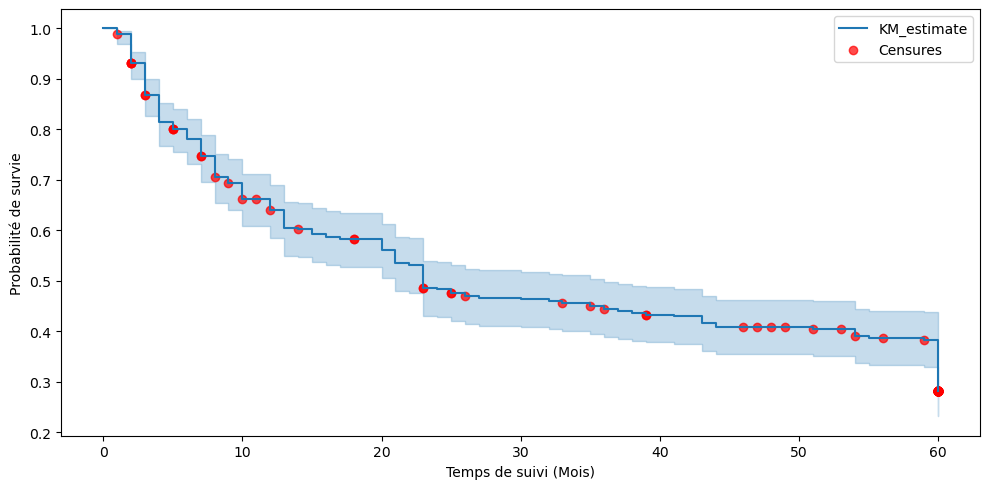

In [103]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialisation du Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustement du modèle avec les données
kmf.fit(df['Tempsdesuivi'], event_observed=df['Deces'])

# Créer une figure plus grande
plt.figure(figsize=(10, 5))

# Tracer la fonction de survie avec les intervalles de confiance
ax = kmf.plot_survival_function(ci_show=True)

# Ajouter les points de censure
censored_times = df.loc[df['Deces'] == 0, 'Tempsdesuivi']
survival_probabilities = [
    float(kmf.survival_function_at_times(t).iloc[0])
    for t in censored_times
]
plt.scatter(
    censored_times,
    survival_probabilities,
    color='red',
    label='Censures',
    alpha=0.7
)

# Titres et légendes
plt.xlabel('Temps de suivi (Mois)')
plt.ylabel('Probabilité de survie')
plt.legend()
#plt.title('Fonction de survie Kaplan–Meier avec Censures')
plt.tight_layout()
plt.show()

### **Probabilites de survie & de deces**

In [46]:
def probabilites_survie_deces(df, time_col, event_col):
    # Instancier l'estimateur Kaplan-Meier
    kmf = KaplanMeierFitter()

    # Ajuster le modèle à vos données
    kmf.fit(durations=df[time_col], event_observed=df[event_col])

    # Extraire les probabilités de survie
    survival_probabilities = kmf.survival_function_
    survival_probabilities.columns = ["Probabilité de survie"]

    # Calculer les probabilités de décès (1 - survie)
    survival_probabilities["Probabilité de décès"] = 1 - survival_probabilities["Probabilité de survie"]

    # Ajouter les temps (index)
    survival_probabilities.reset_index(inplace=True)
    survival_probabilities.rename(columns={"timeline": "Temps t"}, inplace=True)

    return survival_probabilities

# Exemple d'utilisation
# Charger vos données dans un DataFrame df
time_col = "Tempsdesuivi"
event_col = "Deces"

# Appeler la fonction
resultat = probabilites_survie_deces(df, time_col, event_col)

# Afficher le tableau des probabilités
resultat

,Temps t,Probabilité de survie,Probabilité de décès
0,0.0,1.000000,0.000000
1,1.0,0.988131,0.011869
2,2.0,0.931581,0.068419
3,3.0,0.868270,0.131730
4,4.0,0.813623,0.186377
5,5.0,0.801480,0.198520
6,6.0,0.779984,0.220016
7,7.0,0.746205,0.253795
8,8.0,0.705953,0.294047
9,9.0,0.693514,0.306486


### **Taux de mortalites selon le sexe au file du temps**

In [47]:
def taux_mortalite_par_sexe(df, time_col, event_col, sexe_col):

    kmf = KaplanMeierFitter()
    resultats = {}

    # Diviser les données par sexe
    for sexe, group in df.groupby(sexe_col):
        # Ajuster le Kaplan-Meier pour chaque sexe
        kmf.fit(durations=group[time_col], event_observed=group[event_col], label=sexe)

        # Extraire les probabilités de décès cumulées
        surv_func = kmf.survival_function_.copy()
        surv_func["Probabilité de décès"] = 1 - surv_func.iloc[:, 0]  # 1 - Probabilité de survie
        surv_func.rename(columns={kmf._label: "Probabilité de survie"}, inplace=True)

        # Sauvegarder les résultats dans un dictionnaire
        surv_func.reset_index(inplace=True)
        surv_func.rename(columns={"timeline": "Temps t"}, inplace=True)
        resultats[sexe] = surv_func[["Temps t", "Probabilité de survie", "Probabilité de décès"]]

    return resultats

# Exemple d'utilisation
# Supposons un DataFrame `df` avec les colonnes "Tempsdesuivi (Mois)", "Deces" et "SEXE"
time_col = "Tempsdesuivi"
event_col = "Deces"
sexe_col = "SEXE"  # Par exemple, 0 = Femme, 1 = Homme

# Appeler la fonction
taux_par_sexe = taux_mortalite_par_sexe(df, time_col, event_col, sexe_col)

# Afficher les résultats pour chaque groupe
for sexe, tableau in taux_par_sexe.items():
    print(f"\nTaux de mortalité pour le sexe : {sexe}")
    print(tableau)



Taux de mortalité pour le sexe : 0
    Temps t  Probabilité de survie  Probabilité de décès
0       0.0               1.000000              0.000000
1       1.0               0.980769              0.019231
2       2.0               0.942308              0.057692
3       3.0               0.896817              0.103183
4       4.0               0.811718              0.188282
5       5.0               0.798625              0.201375
6       6.0               0.785315              0.214685
7       7.0               0.745384              0.254616
8       8.0               0.705452              0.294548
9       9.0               0.692015              0.307985
10     10.0               0.651308              0.348692
11     12.0               0.617386              0.382614
12     13.0               0.583087              0.416913
13     14.0               0.583087              0.416913
14     16.0               0.576145              0.423855
15     18.0               0.576145              0.42

## **Ditribution de Kaplan-Meier pour chaque groupe de la variable**

### **Variables significatives**

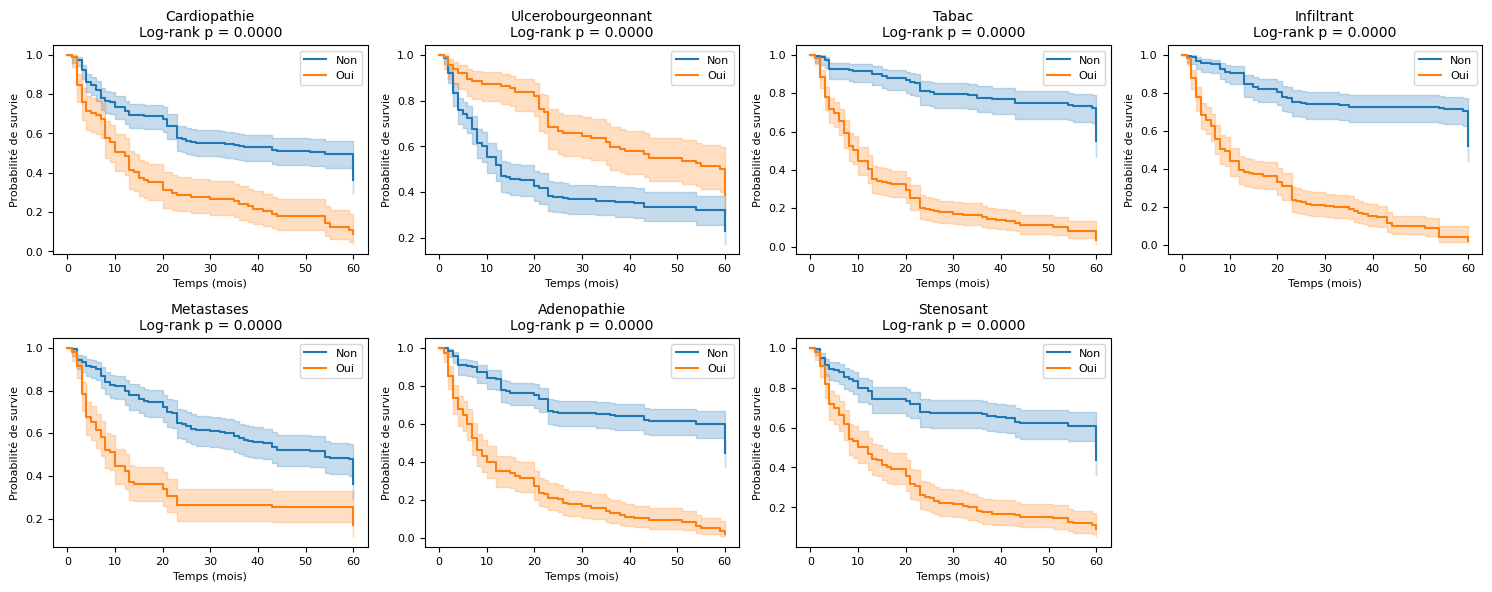

In [48]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Initialisation des variables
time_col = "Tempsdesuivi"  # Nom de la colonne temps
event_col = "Deces"  # Nom de la colonne événement
vars = ['Cardiopathie','Ulcerobourgeonnant', 'Tabac','Infiltrant', 'Metastases','Adenopathie', 'Stenosant']

# Définir des labels descriptifs pour les groupes
labels = {
    'Traitement': {0: "Chirurgie_Chimiothérapie", 1: "Chirurgie_Exclusive"},
    'SEXE': {0: "Femme", 1: "Homme"},
    **{var: {0: "Non", 1: "Oui"} for var in vars if var not in ['Traitement', 'SEXE']}
}

# Déterminer la disposition de la grille pour les sous-graphiques
n_vars = len(vars)
n_cols = 4  # Augmenter le nombre de colonnes pour une disposition compacte
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcul du nombre de lignes

# Création d'une figure compacte avec une grille
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()  # Convertir les axes en une liste pour un accès facile

for idx, var in enumerate(vars):
    ax = axes[idx]

    # Instanciation du KaplanMeierFitter
    kmf = KaplanMeierFitter()

    # Tracer les courbes de Kaplan-Meier pour chaque groupe de la variable
    for group in [0, 1]:
        mask = (df[var] == group)
        label = labels[var][group]  # Utiliser les labels descriptifs
        kmf.fit(df.loc[mask, time_col], event_observed=df.loc[mask, event_col], label=label)
        kmf.plot(ax=ax)

    # Test de log-rank entre les groupes 0 et 1
    results = logrank_test(
        df.loc[df[var] == 0, time_col],
        df.loc[df[var] == 1, time_col],
        event_observed_A=df.loc[df[var] == 0, event_col],
        event_observed_B=df.loc[df[var] == 1, event_col]
    )
    p_value = results.p_value

    # Ajouter le titre et le résultat du test de log-rank
    ax.set_title(f"{var}\nLog-rank p = {p_value:.4f}", fontsize=10)
    ax.set_xlabel("Temps (mois)", fontsize=8)
    ax.set_ylabel("Probabilité de survie", fontsize=8)
    ax.legend(fontsize=8)
    ax.tick_params(axis="both", labelsize=8)

    # Ajouter le numéro de la figure sous chaque graphe
    #ax.text(0.5, -0.35, f"Fig. {idx + 3}: Distribution de survie en fonction {var}",
            #transform=ax.transAxes, ha="center", fontsize=8)


# Supprimer les axes inutilisés si le nombre de variables n'est pas un multiple du nombre de colonnes
for idx in range(len(vars), len(axes)):
    fig.delaxes(axes[idx])

# Ajuster les espacements pour une disposition compacte
plt.tight_layout(pad=1.0)
plt.show()


### **Resultats du test de log-Rank**

In [49]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Colonnes importantes
time_col = "Tempsdesuivi"  # Durée de suivi
event_col = "Deces"  # Événement : 1 = décès, 0 = censuré

# Liste des variables à analyser
factors = ['SEXE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique','Ulcerobourgeonnant', 'Constipation', 'Denitrution', 'Tabac',
    'Mucineux', 'Tubuleux', 'Infiltrant', 'Stenosant', 'Metastases','Adenopathie', 'Traitement']

# Résultats finaux
results = []

# Fonction pour calculer la moyenne de survie
def calculate_mean_survival_time(kmf):
    durations = kmf.event_table.index.values
    survival_probabilities = kmf.survival_function_.values.flatten()
    time_differences = durations[1:] - durations[:-1]
    mean_survival_time = sum(time_differences * survival_probabilities[:-1])
    return mean_survival_time

# Estimation Kaplan-Meier et Log-rank pour chaque variable
for factor in factors:
    #print(f"Analyse pour la variable : {factor}")
    unique_values = df[factor].dropna().unique()

    if len(unique_values) > 1:  # Vérifier que la variable a au moins 2 modalités
        kmf = KaplanMeierFitter()
        group_survival = {}

        # Appliquer Kaplan-Meier pour chaque groupe
        for value in unique_values:
            group = df[df[factor] == value]
            kmf.fit(group[time_col], event_observed=group[event_col])

            # Calculer la moyenne et stocker les résultats
            mean_survival_time = calculate_mean_survival_time(kmf)
            median_survival_time = kmf.median_survival_time_

            group_survival[value] = {
                "mean_survival_time": mean_survival_time,
                "median_survival_time": median_survival_time
            }

            #print(f"  Groupe {value}: Moyenne = {mean_survival_time:.2f}, Médiane = {median_survival_time:.2f}")

        # Comparer les groupes avec un test de Log-rank
        group_1 = df[df[factor] == unique_values[0]]
        group_2 = df[df[factor] == unique_values[1]]

        logrank = logrank_test(
            group_1[time_col], group_2[time_col],
            event_observed_A=group_1[event_col], event_observed_B=group_2[event_col]
        )

        # Stocker les résultats
        results.append({
            "variable": factor,
            "group_1": unique_values[0],
            "group_2": unique_values[1],
            "p_value": logrank.p_value,
            "test_statistic": logrank.test_statistic,
            "group_1_mean": group_survival[unique_values[0]]["mean_survival_time"],
            "group_1_median": group_survival[unique_values[0]]["median_survival_time"],
            "group_2_mean": group_survival[unique_values[1]]["mean_survival_time"],
            "group_2_median": group_survival[unique_values[1]]["median_survival_time"],
        })
    #else:
        #print(f"  La variable {factor} n'a qu'une seule modalité. Analyse non réalisée.\n")

In [50]:
# Résumer les résultats dans un DataFrame
results_df = pd.DataFrame(results)
# Afficher les résultats
print("\nRésumé des résultats :")
results_df


Résumé des résultats :


,variable,group_1,group_2,p_value,test_statistic,group_1_mean,group_1_median,group_2_mean,group_2_median
0,SEXE,0,1,7.406859e-01,0.109525,31.437693,21.0,32.436142,25.0
1,Cardiopathie,0,1,7.829494e-11,42.299941,37.198237,54.0,20.405536,12.0
2,Ulceregastrique,0,1,9.106486e-07,24.108344,35.923690,60.0,25.781490,21.0
3,Douleurepigastrique,1,0,1.505095e-01,2.067079,33.033679,24.0,25.113024,4.0
4,Ulcerobourgeonnant,0,1,1.127879e-05,19.281603,26.873642,13.0,41.823903,60.0
5,Constipation,1,0,1.342754e-02,6.111891,28.489588,21.0,35.867868,60.0
6,Denitrution,1,0,2.821128e-03,8.919687,27.459038,17.0,34.352213,25.0
7,Tabac,1,0,3.911887e-38,166.688892,16.755475,10.0,49.402280,inf
8,Mucineux,1,0,7.713190e-01,0.084477,31.266892,21.0,33.217223,26.0
9,Tubuleux,0,1,1.301695e-11,45.811914,18.623619,10.0,37.335463,59.0


### **Test de Log-Rank : Variables significtives**

In [51]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Colonnes importantes
time_col = "Tempsdesuivi"  # Durée de suivi
event_col = "Deces"  # Événement : 1 = décès, 0 = censuré

# Liste des variables à analyser
factors = ['Cardiopathie', 'Ulcerobourgeonnant', 'Tabac', 'Infiltrant','Metastases', 'Adenopathie','Stenosant']

# Résultats finaux
results = []

# Fonction pour calculer la moyenne de survie
def calculate_mean_survival_time(kmf):
    durations = kmf.event_table.index.values
    survival_probabilities = kmf.survival_function_.values.flatten()
    time_differences = durations[1:] - durations[:-1]
    mean_survival_time = sum(time_differences * survival_probabilities[:-1])
    return mean_survival_time

# Estimation Kaplan-Meier et Log-rank pour chaque variable
for factor in factors:
    #print(f"Analyse pour la variable : {factor}")
    unique_values = df[factor].dropna().unique()

    if len(unique_values) > 1:  # Vérifier que la variable a au moins 2 modalités
        kmf = KaplanMeierFitter()
        group_survival = {}

        # Appliquer Kaplan-Meier pour chaque groupe
        for value in unique_values:
            group = df[df[factor] == value]
            kmf.fit(group[time_col], event_observed=group[event_col])

            # Calculer la moyenne et stocker les résultats
            mean_survival_time = calculate_mean_survival_time(kmf)
            median_survival_time = kmf.median_survival_time_

            group_survival[value] = {
                "mean_survival_time": mean_survival_time,
                "median_survival_time": median_survival_time
            }

            #print(f"  Groupe {value}: Moyenne = {mean_survival_time:.2f}, Médiane = {median_survival_time:.2f}")

        # Comparer les groupes avec un test de Log-rank
        group_1 = df[df[factor] == unique_values[0]]
        group_2 = df[df[factor] == unique_values[1]]

        logrank = logrank_test(
            group_1[time_col], group_2[time_col],
            event_observed_A=group_1[event_col], event_observed_B=group_2[event_col]
        )

        # Stocker les résultats
        results.append({
            "variable": factor,
            "group_1": unique_values[0],
            "group_2": unique_values[1],
            "p_value": logrank.p_value,
            "test_statistic": logrank.test_statistic,
            "group_1_mean": group_survival[unique_values[0]]["mean_survival_time"],
            "group_1_median": group_survival[unique_values[0]]["median_survival_time"],
            "group_2_mean": group_survival[unique_values[1]]["mean_survival_time"],
            "group_2_median": group_survival[unique_values[1]]["median_survival_time"],
        })
    else:
        print(f"  La variable {factor} n'a qu'une seule modalité. Analyse non réalisée.\n")

# Résumer les résultats dans un DataFrame
results_df = pd.DataFrame(results)
# Afficher les résultats
print("\nRésumé des résultats :")
results_df


Résumé des résultats :


,variable,group_1,group_2,p_value,test_statistic,group_1_mean,group_1_median,group_2_mean,group_2_median
0,Cardiopathie,0,1,7.829494e-11,42.299941,37.198237,54.0,20.405536,12.0
1,Ulcerobourgeonnant,0,1,1.127879e-05,19.281603,26.873642,13.0,41.823903,60.0
2,Tabac,1,0,3.911887e-38,166.688892,16.755475,10.0,49.402280,inf
3,Infiltrant,1,0,2.607868e-35,153.764087,17.076847,9.0,47.450964,inf
4,Metastases,1,0,1.001639e-09,37.321698,21.574052,10.0,39.569722,54.0
5,Adenopathie,1,0,6.833138e-32,138.127889,15.441106,8.0,42.781509,60.0
6,Stenosant,1,0,3.374703e-19,80.205244,19.285141,12.0,42.668364,60.0


### **Variables non significatives**

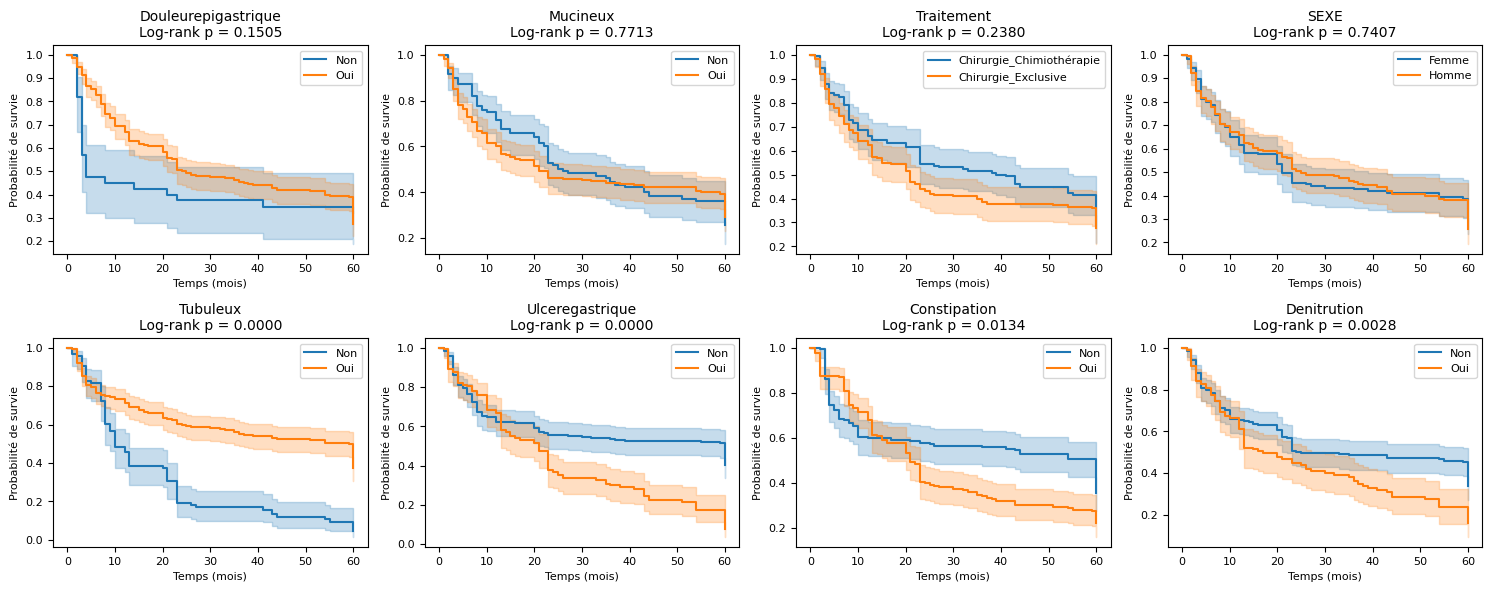

In [52]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Initialisation des variables
time_col = "Tempsdesuivi"  # Nom de la colonne temps
event_col = "Deces"  # Nom de la colonne événement
vars = ['Douleurepigastrique','Mucineux', 'Traitement', "SEXE",'Tubuleux','Ulceregastrique','Constipation', 'Denitrution']

# Définir des labels descriptifs pour les groupes
labels = {
    'Traitement': {0: "Chirurgie_Chimiothérapie", 1: "Chirurgie_Exclusive"},
    'SEXE': {0: "Femme", 1: "Homme"},
    **{var: {0: "Non", 1: "Oui"} for var in vars if var not in ['Traitement', 'SEXE']}
}

# Déterminer la disposition de la grille pour les sous-graphiques
n_vars = len(vars)
n_cols = 4 # Augmenter le nombre de colonnes pour une disposition compacte
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcul du nombre de lignes

# Création d'une figure compacte avec une grille
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()  # Convertir les axes en une liste pour un accès facile

for idx, var in enumerate(vars):
    ax = axes[idx]

    # Instanciation du KaplanMeierFitter
    kmf = KaplanMeierFitter()

    # Tracer les courbes de Kaplan-Meier pour chaque groupe de la variable
    for group in [0, 1]:
        mask = (df[var] == group)
        label = labels[var][group]  # Utiliser les labels descriptifs
        kmf.fit(df.loc[mask, time_col], event_observed=df.loc[mask, event_col], label=label)
        kmf.plot(ax=ax)

    # Test de log-rank entre les groupes 0 et 1
    results = logrank_test(
        df.loc[df[var] == 0, time_col],
        df.loc[df[var] == 1, time_col],
        event_observed_A=df.loc[df[var] == 0, event_col],
        event_observed_B=df.loc[df[var] == 1, event_col]
    )
    p_value = results.p_value

    # Ajouter le titre et le résultat du test de log-rank
    ax.set_title(f"{var}\nLog-rank p = {p_value:.4f}", fontsize=10)
    ax.set_xlabel("Temps (mois)", fontsize=8)
    ax.set_ylabel("Probabilité de survie", fontsize=8)
    ax.legend(fontsize=8)
    ax.tick_params(axis="both", labelsize=8)

    # Ajouter le numéro de la figure sous chaque graphe
    #ax.text(0.5, -0.35, f"Fig. {idx + 10}: {var}",
            #transform=ax.transAxes, ha="center", fontsize=8)


# Supprimer les axes inutilisés si le nombre de variables n'est pas un multiple du nombre de colonnes
for idx in range(len(vars), len(axes)):
    fig.delaxes(axes[idx])

# Ajuster les espacements pour une disposition compacte
plt.tight_layout(pad=1.0)
plt.show()


### **Test de Log-Rank : Variables Non Significatives**

In [53]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Colonnes importantes
time_col = "Tempsdesuivi"  # Durée de suivi
event_col = "Deces"  # Événement : 1 = décès, 0 = censuré

# Liste des variables à analyser
factors = ['Douleurepigastrique','Mucineux', 'Traitement', "SEXE",'Tubuleux','Ulceregastrique','Constipation', 'Denitrution']

# Résultats finaux
results = []

# Fonction pour calculer la moyenne de survie
def calculate_mean_survival_time(kmf):
    durations = kmf.event_table.index.values
    survival_probabilities = kmf.survival_function_.values.flatten()
    time_differences = durations[1:] - durations[:-1]
    mean_survival_time = sum(time_differences * survival_probabilities[:-1])
    return mean_survival_time

# Estimation Kaplan-Meier et Log-rank pour chaque variable
for factor in factors:
    #print(f"Analyse pour la variable : {factor}")
    unique_values = df[factor].dropna().unique()

    if len(unique_values) > 1:  # Vérifier que la variable a au moins 2 modalités
        kmf = KaplanMeierFitter()
        group_survival = {}

        # Appliquer Kaplan-Meier pour chaque groupe
        for value in unique_values:
            group = df[df[factor] == value]
            kmf.fit(group[time_col], event_observed=group[event_col])

            # Calculer la moyenne et stocker les résultats
            mean_survival_time = calculate_mean_survival_time(kmf)
            median_survival_time = kmf.median_survival_time_

            group_survival[value] = {
                "mean_survival_time": mean_survival_time,
                "median_survival_time": median_survival_time
            }

            #print(f"  Groupe {value}: Moyenne = {mean_survival_time:.2f}, Médiane = {median_survival_time:.2f}")

        # Comparer les groupes avec un test de Log-rank
        group_1 = df[df[factor] == unique_values[0]]
        group_2 = df[df[factor] == unique_values[1]]

        logrank = logrank_test(
            group_1[time_col], group_2[time_col],
            event_observed_A=group_1[event_col], event_observed_B=group_2[event_col]
        )

        # Stocker les résultats
        results.append({
            "variable": factor,
            "group_1": unique_values[0],
            "group_2": unique_values[1],
            "p_value": logrank.p_value,
            "test_statistic": logrank.test_statistic,
            "group_1_mean": group_survival[unique_values[0]]["mean_survival_time"],
            "group_1_median": group_survival[unique_values[0]]["median_survival_time"],
            "group_2_mean": group_survival[unique_values[1]]["mean_survival_time"],
            "group_2_median": group_survival[unique_values[1]]["median_survival_time"],
        })
    else:
        print(f"  La variable {factor} n'a qu'une seule modalité. Analyse non réalisée.\n")

# Résumer les résultats dans un DataFrame
results_df = pd.DataFrame(results)
# Afficher les résultats
print("\nRésumé des résultats :")
results_df


Résumé des résultats :


,variable,group_1,group_2,p_value,test_statistic,group_1_mean,group_1_median,group_2_mean,group_2_median
0,Douleurepigastrique,1,0,1.505095e-01,2.067079,33.033679,24.0,25.113024,4.0
1,Mucineux,1,0,7.713190e-01,0.084477,31.266892,21.0,33.217223,26.0
2,Traitement,1,0,2.380196e-01,1.392285,29.743202,21.0,34.739229,41.0
3,SEXE,0,1,7.406859e-01,0.109525,31.437693,21.0,32.436142,25.0
4,Tubuleux,0,1,1.301695e-11,45.811914,18.623619,10.0,37.335463,59.0
5,Ulceregastrique,0,1,9.106486e-07,24.108344,35.923690,60.0,25.781490,21.0
6,Constipation,1,0,1.342754e-02,6.111891,28.489588,21.0,35.867868,60.0
7,Denitrution,1,0,2.821128e-03,8.919687,27.459038,17.0,34.352213,25.0


# **II. Modele a risque proportionnel de Cox**
La méthode de Kaplan-Meier ne tient pas compte des variables confondantes. Ont peut utilisé le modèle de Cox Proportional Hazards pour ajuster les résultats en fonction de variables.

In [54]:
df = pd.read_excel("C:/Users/Sefdine/Documents/Memoire/Rappot Final/Correction/data/GastricCancerData.xlsx")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identifier les colonnes catégoriques
CatCols = df.select_dtypes(include=['object']).columns
# Encodage des variables catégoriques
#Label Encoding
label_encoder = LabelEncoder()
for col in CatCols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [55]:
from lifelines import CoxPHFitter
# Ajuster le modèle de Cox
cph = CoxPHFitter()
cph.fit(df, duration_col="Tempsdesuivi", event_col="Deces")
cph.print_summary()
# Visualiser les coefficients de survie
cph.plot()

<lifelines.CoxPHFitter: fitted with 337 total observations, 114 right-censored observations>
             duration col = 'Tempsdesuivi'
                event col = 'Deces'
      baseline estimation = breslow
   number of observations = 337
number of events observed = 223
   partial log-likelihood = -996.10
         time fit was run = 2025-05-05 10:40:38 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
AGE                 -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99
SEXE                -0.17      0.84      0.15           -0.47            0.13                0.62                1.13
Cardiopathie         0.49      1.64      0.16            0.18            0.81                1.19                2.25
Ulceregastrique      0.49      1.63      0.16            0.18            0.81                1.19                2.24
Douleurepigastrique -0.71      0.49      0.23           -1.17           -0.25                0.31                0.78
Ulcerobourgeonnant  -0.47      0.62      0.17           -0.81           -0.13                0.44                0.87
Constipation        -0.01      0.99      0.15           -0.30            0.28                0.74                1.32
Denitrution         -0.59      0.55      0.17           -0.92           -0.26                0.40                0.77
Tabac                1.18      3.25      0.22            0.74            1.62                2.10                5.03
Mucineux            -0.71      0.49      0.20           -1.10           -0.33                0.33                0.72
Tubuleux            -0.27      0.76      0.16           -0.58            0.04                0.56                1.04
Infiltrant           1.05      2.86      0.20            0.65            1.45                1.92                4.27
Stenosant            0.49      1.63      0.17            0.16            0.82                1.17                2.26
Metastases           1.23      3.42      0.21            0.82            1.64                2.28                5.14
Adenopathie          0.99      2.68      0.20            0.60            1.38                1.82                3.96
Traitement           0.05      1.06      0.14           -0.22            0.33                0.80                1.39

                     cmp to     z      p  -log2(p)
covariate                                         
AGE                    0.00 -3.04 <0.005      8.72
SEXE                   0.00 -1.14   0.25      1.98
Cardiopathie           0.00  3.06 <0.005      8.83
Ulceregastrique        0.00  3.05 <0.005      8.78
Douleurepigastrique    0.00 -3.04 <0.005      8.73
Ulcerobourgeonnant     0.00 -2.74   0.01      7.36
Constipation           0.00 -0.07   0.94      0.09
Denitrution            0.00 -3.52 <0.005     11.20
Tabac                  0.00  5.31 <0.005     23.10
Mucineux               0.00 -3.62 <0.005     11.71
Tubuleux               0.00 -1.71   0.09      3.52
Infiltrant             0.00  5.14 <0.005     21.83
Stenosant              0.00  2.91 <0.005      8.11
Metastases             0.00  5.93 <0.005     28.32
Adenopathie            0.00  4.98 <0.005     20.55
Traitement             0.00  0.39   0.70      0.51
---
Concordance = 0.85
Partial AIC = 2024.20
log-likelihood ratio test = 356.27 on 16 df
-log2(p) of ll-ratio test = 216.90

<Axes: xlabel='log(HR) (95% CI)'>

 ## **Methode Stepwise (sélection pas à pas)**

In [56]:
#Fonction pour la sélection pas à pas
from lifelines import CoxPHFitter

def stepwise_selection(df, time_col, event_col, variables, threshold_in=0.05, threshold_out=0.10):
    selected_vars = []
    remaining_vars = list(variables)

    while remaining_vars:
        # Étape 1 : Test d'ajout des variables restantes
        new_pvalues = []
        for var in remaining_vars:
            try:
                model_vars = selected_vars + [var]
                cph = CoxPHFitter()
                cph.fit(df[[time_col, event_col] + model_vars], duration_col=time_col, event_col=event_col)
                p_value = cph.summary.loc[var, 'p']
                new_pvalues.append((var, p_value))
            except Exception as e:
                print(f"Erreur lors de l'ajout de la variable {var}: {e}")
                continue

        # Sélectionner la variable avec la plus petite p-value
        if new_pvalues:
            new_pvalues.sort(key=lambda x: x[1])
            if new_pvalues[0][1] < threshold_in:
                selected_vars.append(new_pvalues[0][0])
                remaining_vars.remove(new_pvalues[0][0])
                print(f"Ajouté : {new_pvalues[0][0]} avec p={new_pvalues[0][1]:.4f}")
            else:
                break
        else:
            break

        # Étape 2 : Test de suppression des variables existantes
        for var in selected_vars[:]:  # Copier la liste pour éviter des erreurs lors de la suppression
            try:
                cph = CoxPHFitter()
                cph.fit(df[[time_col, event_col] + selected_vars], duration_col=time_col, event_col=event_col)
                if cph.summary.loc[var, 'p'] > threshold_out:
                    print(f"Supprimé : {var} avec p={cph.summary.loc[var, 'p']:.4f}")
                    selected_vars.remove(var)
            except Exception as e:
                print(f"Erreur lors du test de suppression pour {var}: {e}")
                continue

    return selected_vars

# utilisation
time_col = 'Tempsdesuivi'
event_col = 'Deces'
variables = ['AGE', 'SEXE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique','Ulcerobourgeonnant', 'Constipation', 'Denitrution', 'Tabac',
             'Mucineux', 'Tubuleux', 'Infiltrant', 'Stenosant', 'Metastases','Adenopathie', 'Traitement']

# Exécuter la sélection pas à pas
selected_vars = stepwise_selection(df, time_col, event_col, variables)
print("Variables sélectionnées :", selected_vars)

Ajouté : Tabac avec p=0.0000
Ajouté : Infiltrant avec p=0.0000
Ajouté : Metastases avec p=0.0000
Ajouté : Stenosant avec p=0.0000
Ajouté : Denitrution avec p=0.0004
Ajouté : Cardiopathie avec p=0.0010
Ajouté : Adenopathie avec p=0.0062
Ajouté : Mucineux avec p=0.0014
Ajouté : Ulceregastrique avec p=0.0037
Ajouté : Ulcerobourgeonnant avec p=0.0100
Ajouté : AGE avec p=0.0397
Ajouté : Douleurepigastrique avec p=0.0091
Variables sélectionnées : ['Tabac', 'Infiltrant', 'Metastases', 'Stenosant', 'Denitrution', 'Cardiopathie', 'Adenopathie', 'Mucineux', 'Ulceregastrique', 'Ulcerobourgeonnant', 'AGE', 'Douleurepigastrique']


### **Validation du modèle final de Cox**

In [57]:
cph = CoxPHFitter()
cph.fit(df[[time_col, event_col] + selected_vars], duration_col=time_col, event_col=event_col)
cph.print_summary()
cph.plot()

<lifelines.CoxPHFitter: fitted with 337 total observations, 114 right-censored observations>
             duration col = 'Tempsdesuivi'
                event col = 'Deces'
      baseline estimation = breslow
   number of observations = 337
number of events observed = 223
   partial log-likelihood = -998.32
         time fit was run = 2025-05-05 10:40:56 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
Tabac                1.23      3.43      0.22            0.80            1.66                2.24                5.26
Infiltrant           1.06      2.87      0.21            0.65            1.46                1.92                4.30
Metastases           1.31      3.70      0.20            0.91            1.71                2.48                5.50
Stenosant            0.44      1.56      0.16            0.13            0.75                1.14                2.13
Denitrution         -0.63      0.53      0.17           -0.95           -0.30                0.39                0.74
Cardiopathie         0.47      1.60      0.16            0.16            0.79                1.17                2.19
Adenopathie          0.98      2.67      0.20            0.59            1.37                1.81                3.94
Mucineux            -0.73      0.48      0.20           -1.11           -0.35                0.33                0.71
Ulceregastrique      0.51      1.67      0.16            0.21            0.82                1.23                2.27
Ulcerobourgeonnant  -0.49      0.61      0.17           -0.83           -0.15                0.44                0.86
AGE                 -0.02      0.98      0.01           -0.04           -0.01                0.97                0.99
Douleurepigastrique -0.58      0.56      0.22           -1.02           -0.15                0.36                0.86

                     cmp to     z      p  -log2(p)
covariate                                         
Tabac                  0.00  5.65 <0.005     25.89
Infiltrant             0.00  5.13 <0.005     21.75
Metastases             0.00  6.44 <0.005     32.93
Stenosant              0.00  2.79   0.01      7.57
Denitrution            0.00 -3.76 <0.005     12.53
Cardiopathie           0.00  2.95 <0.005      8.28
Adenopathie            0.00  4.96 <0.005     20.43
Mucineux               0.00 -3.73 <0.005     12.37
Ulceregastrique        0.00  3.29 <0.005      9.98
Ulcerobourgeonnant     0.00 -2.85 <0.005      7.82
AGE                    0.00 -2.73   0.01      7.29
Douleurepigastrique    0.00 -2.61   0.01      6.79
---
Concordance = 0.85
Partial AIC = 2020.64
log-likelihood ratio test = 351.83 on 12 df
-log2(p) of ll-ratio test = 223.36

<Axes: xlabel='log(HR) (95% CI)'>

### **Prediction de la duree mediane de survie**

In [58]:
from sklearn.model_selection import train_test_split

# Divisez les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Prédiction de la durée médiane de survie pour chaque patient
try:
    median_survival_times = cph.predict_median(test_data)
    test_data["Median Survival Time"] = median_survival_times
except Exception as e:
    print(f"Erreur lors de la prédiction de la durée médiane de survie : {e}")

# Gestion des valeurs infinies dans les colonnes pertinentes
if "Tempsdesuivi" in test_data.columns:
    test_data["Tempsdesuivi"] = test_data["Tempsdesuivi"].replace([float('inf')], 120)

# Affichage des 10 premières prédictions
print("\nPrédictions de la durée médiane (Temps de suivi en Mois) :")
if "Tempsdesuivi (Mois)" in test_data.columns:
    print(test_data[["Median Survival Time", "Tempsdesuivi"]].head(10))

# Analyse des patients avec prédictions infinies ajustées
if "Tempsdesuivi" in test_data.columns:
    patients_inf = test_data[test_data["Tempsdesuivi"] == 120]
    print(f"\nNombre de patients avec une prédiction ajustée à 120 mois : {len(patients_inf)}")

# Évaluation : Concordance Index
try:
    c_index_cox = cph.concordance_index_
    print(f"\nConcordance Index sur l'ensemble de test : {c_index_cox:.2f}")
except AttributeError:
    print("Erreur : Le modèle Cox n'a pas encore été ajusté.")


Prédictions de la durée médiane (Temps de suivi en Mois) :

Nombre de patients avec une prédiction ajustée à 120 mois : 0

Concordance Index sur l'ensemble de test : 0.85


Nombre de patients avec une prédiction ajustée à 120 mois : 0

Cela signifie qu'aucun patient n'a eu une prédiction de durée médiane de survie ajustée à 120 mois dans le traitement des valeurs infinies.
C'est un indicateur positif montrant que les prédictions initiales du modèle ne nécessitaient pas d'ajustement arbitraire pour limiter les valeurs infinies.
Concordance Index `(C-index) : 0.85`

Le Concordance Index est une mesure de la performance prédictive des modèles de survie. Une valeur proche de 1 indique une forte concordance entre les prédictions du modèle et les observations réelles.
Avec un C-index de 0.8507, le modèle démontre une bonne capacité à discriminer les patients avec des temps de survie différents, ce qui reflète une performance robuste.

## **Integrated Brier Score (IBS)**

IBS Train: 0.094
IBS Test: 0.080


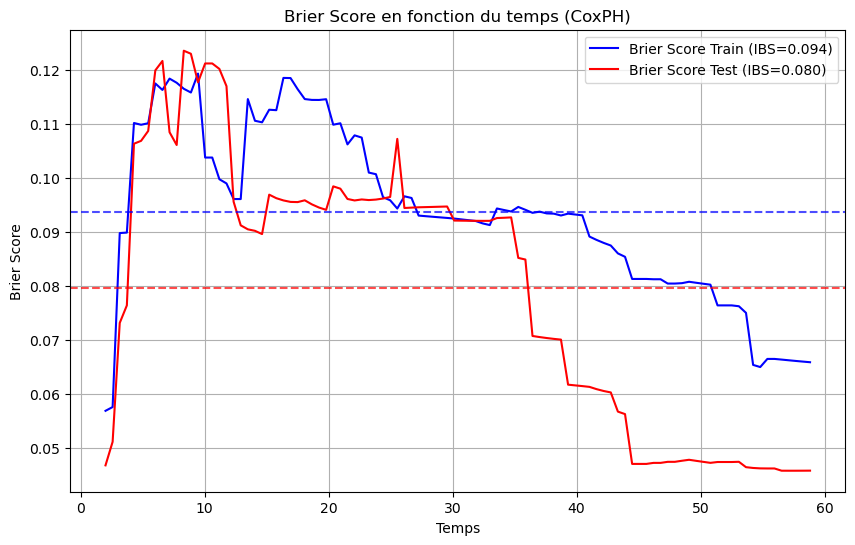

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sksurv.metrics import brier_score, integrated_brier_score
from sklearn.model_selection import train_test_split

# Définition des colonnes
time_col = "Tempsdesuivi"
event_col = "Deces"
selected_vars = [col for col in df.columns if col not in [time_col, event_col]]

# Séparation des données en train et test
X_train, X_test, T_train, T_test, E_train, E_test = train_test_split(
    df[selected_vars], df[time_col], df[event_col], test_size=0.2, random_state=42
)

# Définition de l'intervalle de temps d'évaluation
t_min, t_max = T_test.min(), T_test.max() * 0.99
evaluation_times = np.linspace(t_min, t_max, 100, endpoint=False)

# Prédiction des fonctions de survie
surv_train = cph.predict_survival_function(X_train)
surv_test = cph.predict_survival_function(X_test)

# Interpolation des courbes de survie
def interpolate_survival(surv_df, eval_times):
    n_individuals = surv_df.shape[1]
    surv_preds = np.zeros((n_individuals, len(eval_times)))
    
    for i, col in enumerate(surv_df.columns):
        f = interp1d(
            surv_df.index.values, surv_df[col].values,
            bounds_error=False, fill_value=(1.0, surv_df[col].values[-1])
        )
        surv_preds[i, :] = f(eval_times)
    
    return surv_preds

surv_preds_train = interpolate_survival(surv_train, evaluation_times)
surv_preds_test = interpolate_survival(surv_test, evaluation_times)

# Conversion en format structuré pour sksurv
surv_train_data = np.array([(bool(e), t) for e, t in zip(E_train, T_train)], dtype=[('event', bool), ('time', float)])
surv_test_data = np.array([(bool(e), t) for e, t in zip(E_test, T_test)], dtype=[('event', bool), ('time', float)])

# Calcul des Brier Scores à chaque instant de temps
_, brier_scores_train_cox = brier_score(surv_train_data, surv_train_data, surv_preds_train, evaluation_times)
_, brier_scores_test_cox = brier_score(surv_train_data, surv_test_data, surv_preds_test, evaluation_times)

# Calcul des IBS
ibs_train_cox = integrated_brier_score(surv_train_data, surv_train_data, surv_preds_train, evaluation_times)
ibs_test_cox = integrated_brier_score(surv_train_data, surv_test_data, surv_preds_test, evaluation_times)

# Affichage des résultats
print(f"IBS Train: {ibs_train_cox:.3f}")
print(f"IBS Test: {ibs_test_cox:.3f}")

# Tracé du Brier Score en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(evaluation_times, brier_scores_train_cox, label=f'Brier Score Train (IBS={ibs_train_cox:.3f})', color='blue')
plt.plot(evaluation_times, brier_scores_test_cox, label=f'Brier Score Test (IBS={ibs_test_cox:.3f})', color='red')
plt.axhline(y=ibs_train_cox, color='blue', linestyle='--', alpha=0.7)
plt.axhline(y=ibs_test_cox, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Temps')
plt.ylabel('Brier Score')
plt.title('Brier Score en fonction du temps (CoxPH)')
plt.legend()
plt.grid(True)
plt.show()

## **les valeurs SHAP globales**

  0%|          | 0/100 [00:00<?, ?it/s]

Importance globale des variables :
               Variable  SHAP_mean_abs  SHAP_mean
10           Metastases       2.107919  -0.000082
11          Adenopathie       1.446852  -0.001328
8            Infiltrant       1.167370  -0.000862
6                 Tabac       1.124632  -0.002578
7              Mucineux       1.124337  -0.002075
5           Denitrution       0.954869  -0.001206
2       Ulceregastrique       0.833784   0.001460
1          Cardiopathie       0.742151   0.000335
3   Douleurepigastrique       0.692928   0.003244
9             Stenosant       0.691878  -0.000724
0                   AGE       0.520965   0.000895
4    Ulcerobourgeonnant       0.515872   0.002922


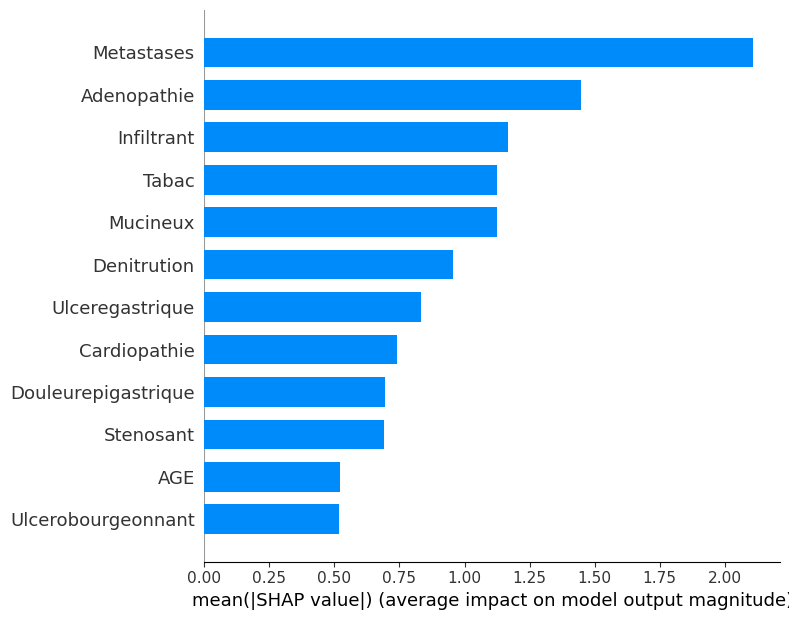

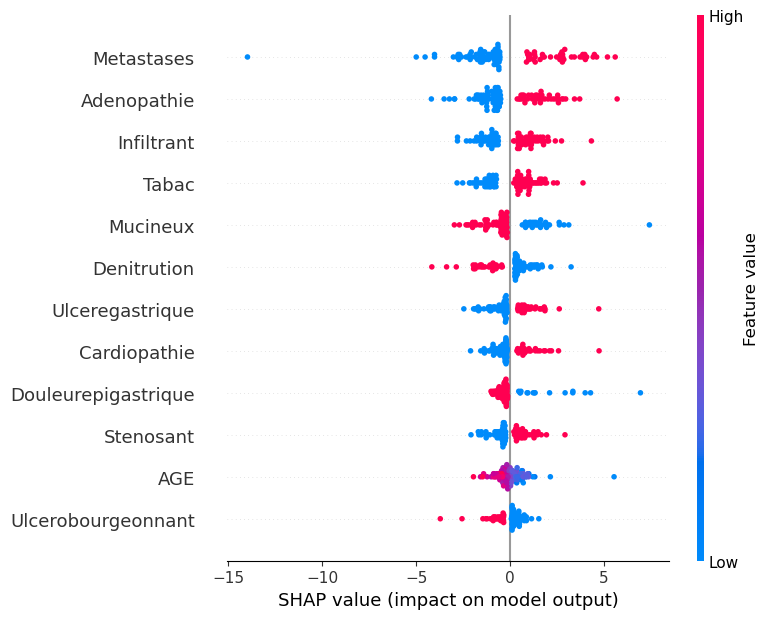

In [104]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
selected_vars = ['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique','Ulcerobourgeonnant', 'Denitrution', 'Tabac', 'Mucineux',
                 'Infiltrant', 'Stenosant', 'Metastases', 'Adenopathie']
# 1. Fonction prédictive pour KernelExplainer
def cox_predict(X):
    # Si X est ndarray, convertir en DataFrame avec les bons noms
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=selected_vars)
    return cph.predict_partial_hazard(X).values

# 2. Échantillon pour accélérer le calcul SHAP
sample_df = df[selected_vars].sample(n=100, random_state=42)

# 3. Création de l'explainer et calcul des valeurs SHAP
explainer = shap.KernelExplainer(cox_predict, sample_df)
raw_shap = explainer.shap_values(sample_df)

# 4. Gérer le cas multiclasses (ex. liste de matrices)
if isinstance(raw_shap, list):
    shap_values = raw_shap[0]
else:
    shap_values = raw_shap

# 5. Vérification des dimensions
assert shap_values.shape[1] == len(selected_vars), \
    f"Erreur : {shap_values.shape[1]} SHAP values vs {len(selected_vars)} variables"

# 6. Calcul des importances globales
shap_global = pd.DataFrame({
    "Variable": selected_vars,
    "SHAP_mean_abs": np.abs(shap_values).mean(axis=0),
    "SHAP_mean": shap_values.mean(axis=0)
}).sort_values("SHAP_mean_abs", ascending=False)

# Affichage des résultats globaux
print("Importance globale des variables :")
print(shap_global[["Variable", "SHAP_mean_abs", "SHAP_mean"]])

# 7A. Graphique barplot de l’importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sample_df, plot_type="bar", show=False)
#plt.title("Importance Moyenne des Variables (|SHAP|)")
plt.tight_layout()
plt.savefig("imp0.png")
plt.show()

# 7B. Graphique beeswarm
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sample_df, plot_type="dot", show=False)
#plt.title("Distribution des Effets SHAP par Variable")
plt.tight_layout()
plt.savefig("shap0.png")
plt.show()

# 8. Export complet des données SHAP
full_shap_df = pd.DataFrame(shap_values, columns=selected_vars)
full_shap_df = pd.concat(
    [sample_df.reset_index(drop=True),
     full_shap_df.add_suffix('_SHAP')],
    axis=1
)

# Sauvegarde CSV facultative :
# full_shap_df.to_csv("shap_détails.csv", index=False)
#plt.savefig('De1.png', dpi=300, bbox_inches='tight')

In [57]:
print(f"Valeur de base (risque moyen) : {explainer.expected_value:.2f}")

Valeur de base (risque moyen) : 3.57


**Interprétation des résultats** :  
L’analyse SHAP a mis en évidence que **les métastases**, présentes chez 43 % des patients, **ont constitué le facteur de risque principal** avec un impact SHAP de 2,01, indiquant une influence majeure sur l’augmentation du risque. **L’adénopathie** (41 % des cas) et **le tabagisme** (54 % des cas) **ont suivi**, avec des valeurs SHAP respectives de 1,44 et 1,22, confirmant leur rôle significatif dans la prédiction du risque. Les caractéristiques tumorales **infiltrantes** (52 % des cas, SHAP = 1,17) et **mucineux** (65 % des cas, SHAP = 1,11) **ont également contribué de manière notable**, bien qu’avec une intensité légèrement inférieure.  

Parmi les facteurs moins déterminants mais non négligeables, **la dénutrition** (34 % des cas, SHAP = 0,93) et **l’ulcère gastrique** (38 % des cas, SHAP = 0,82) **ont montré un impact modéré**, tandis que **l’âge moyen** (52 ans) **a joué un rôle plus limité** (SHAP = 0,50), malgré sa prévalence systématique. Des variables comme **la douleur épigastrique** (87 % des cas, SHAP = 0,57) et **la forme ulcéro-bourgeonnante** (34 % des cas, SHAP = 0,53) **ont eu une contribution mineure**, reflétant des effets cliniquement moins marqués. Ces résultats **ont souligné l’hétérogénéité des facteurs pronostiques**, avec une prédominance nette des critères tumoraux et comportementaux (tabac) dans l’estimation globale du risque.

# **Approche du Machine Learning**


1. **Random Survival Forest**
2. **Gradient Boosted Survival Trees (GBST)**
3. **Machine à vecteurs de support de survie (Survival SVM)**
4. **Deep Survival Models**


## **Données employées**  
Les variables cliniques et tumorales retenues pour l'analyse du risque de décès chez les patients atteints d'un cancer de l'estomac ont été sélectionnées selon leur pertinence statistique dans le modèle de Cox et leur contribution explicative mesurée par les valeurs SHAP. Parmi ces variables figuraient :**l'âge des patients**, la présence de **comorbidités (cardiopathies)**, des **symptômes cliniques** (douleur épigastrique, ulcère gastrique, lésion ulcéro-bourgeonnante), des **facteurs liés au mode de vie** (tabagisme, dénutrition), ainsi que des **caractéristiques tumorales** spécifiques (forme mucineuse, infiltration, sténose, métastases et adénopathies). Ces critères ont été retenus car ils ont systématiquement démontré, à travers le modèle de Cox et leurs valeurs SHAP positives, une influence significative sur la réduction de la survie. La robustesse de ces variables, validée à la fois par une approche statistique classique et par une analyse d'interprétabilité moderne (SHAP), fournit une base solide pour les explorations ultérieures.
Dans ce chapitres, nous étendrons cette analyse à des approches de *machine learning*, afin de comparer les performances prédictives et les insights cliniques entre méthodes traditionnelles et algorithmes avancés.  


## **I.Random Survival Forest**


In [61]:
# Effacer les variables non pertinantes
clean=['SEXE','Tubuleux','Traitement','Constipation']
df=df.drop(columns=clean,axis=1)
df.columns

Index(['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique',
       'Ulcerobourgeonnant', 'Denitrution', 'Tabac', 'Mucineux', 'Infiltrant',
       'Stenosant', 'Metastases', 'Adenopathie', 'Tempsdesuivi', 'Deces'],
      dtype='object')

In [62]:
n_censored = df.shape[0] - df["Deces"].sum()
print(f"{n_censored / df.shape[0] * 100:.1f}% des enregistrements sont censurés")

33.8% des enregistrements sont censurés


**Interprétation du taux de censure :**  
Une proportion de **33,8 % des enregistrements** a été identifiée comme **censurée**, signifiant que ces patients n’ont pas connu l’événement d’intérêt (décès) avant la fin de la période d’étude ou ont été perdus de vue. Ce taux, bien qu’élevé, est typique des études de survie en contexte clinique, où le suivi à long terme est souvent limité. La présence de censure a été explicitement prise en compte dans les méthodes d’évaluation (ex. C-index adapté) pour éviter une surestimation des risques, conformément aux bonnes pratiques en analyse de survie [5](https://link.springer.com/article/10.1007/s10985-006-9022-0). Cette gestion rigoureuse a permis de garantir que les résultats restaient interprétables et robustes malgré les données incomplètes.

In [46]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi"], axis=1)

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a Random Surival Forest model with all metabolites
rsf = RandomSurvivalForest(random_state=42)
rsf.fit(X_train,y_train)

# using all metabolites as feature,and get a concordance index of 0.660458 in testing data
print('training data c-index: %f' % rsf.score(X_train,y_train))
print('testing data c-index: %f' % rsf.score(X_test,y_test))

training data c-index: 0.879943
testing data c-index: 0.836175


## **Optimisation des hyperparamètres**  
Dans le cadre de notre étude, nous avons déterminé les hyperparamètres optimaux en adoptant une approche basée sur la validation croisée et la recherche en grille (GridSearchCV). Dans un premier temps, nous avons défini une grille d’hyperparamètres pour chaque modèle, incluant des paramètres tels que le nombre d’estimateurs, la profondeur maximale, le taux d’apprentissage et d’autres paramètres spécifiques aux modèles Random Survival Forest et Gradient Boosting Survival Analysis. Par la suite, nous avons appliqué GridSearchCV avec une validation croisée à cinq plis afin d’évaluer systématiquement l’ensemble des combinaisons possibles. Nous avons utilisé l’indice de concordance (C-index) comme critère de performance pour mesurer la capacité prédictive des modèles sur les données de survie. Cette méthodologie nous a permis d’identifier, de manière exhaustive et automatisée, les configurations d’hyperparamètres qui maximisaient la performance des modèles tout en assurant leur robustesse et leur généralisation.

In [61]:
import numpy as np
import pandas as pd
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import GridSearchCV, KFold

# Définition des modèles et des grilles de recherche
tab_params = {
    'random_survival_forest': {
        'model': RandomSurvivalForest(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'gradient_boosting_survival': {
        'model': GradientBoostingSurvivalAnalysis(random_state=42),
        'params': {
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

# Fonction de scoring pour GridSearchCV (utilisation de concordance_index_censored)
def c_index_scorer(model, X, y):
    ci = concordance_index_censored(y["event"], y["time"], model.predict(X))[0]
    return ci

# Exécution de GridSearchCV pour chaque modèle
results = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, mp in tab_params.items():
    grid_search = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=cv,
        scoring=c_index_scorer,
        n_jobs=-1  # Utilisation de tous les cœurs disponibles
    )

    grid_search.fit(X_train, y_train)

    results.append({
        'model': model_name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })

# Affichage des résultats sous forme de DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                        model  best_score  \
0      random_survival_forest    0.858379   
1  gradient_boosting_survival    0.857970   

                                         best_params  
0  {'min_samples_leaf': 1, 'min_samples_split': 2...  
1  {'learning_rate': 0.2, 'min_samples_leaf': 1, ...  


In [62]:
results_df.loc[0,"best_params"]

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [63]:
results_df.loc[1,"best_params"]

{'learning_rate': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.utils import resample

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi"], axis=1)

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustement du modèle Random Survival Forest
rsf = RandomSurvivalForest(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)
rsf.fit(X_train, y_train)

# Calcul des C-index
c_index_train_rsf = rsf.score(X_train, y_train)
c_index_test_rsf = rsf.score(X_test, y_test)

print(f'Training data C-index: {c_index_train_rsf:.2f}')
print(f'Testing data C-index: {c_index_test_rsf:.2f}')

# Bootstrap pour intervalle de confiance du C-index
n_bootstraps = 1000
random_state = 42
bootstrap_c_indexes = []

np.random.seed(random_state)
for _ in range(n_bootstraps):
    X_test_sample, y_test_sample = resample(X_test, y_test)
    c_index = rsf.score(X_test_sample, y_test_sample)
    bootstrap_c_indexes.append(c_index)

# Calcul de l'intervalle de confiance
alpha = 0.95
lower_bound = np.percentile(bootstrap_c_indexes, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bootstrap_c_indexes, (1 + alpha) / 2 * 100)
mean_c_index_rsf = np.mean(bootstrap_c_indexes)

print(f"C-index intervalle ({alpha*100:.0f}% IC): [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"C-index moyenne: {mean_c_index_rsf:.2f}")

Training data C-index: 0.95
Testing data C-index: 0.87
C-index intervalle (95% IC): [0.82, 0.91]
C-index moyenne: 0.87


Les résultats avaient montré que le modèle avait été performant dans sa capacité à discriminer entre les différentes issues. Sur l'ensemble d'entraînement, le C-index avait atteint 0,95, ce qui indiquait une excellente aptitude du modèle à différencier correctement les observations. Lorsqu'il avait été évalué sur l'ensemble de test, le C-index s'était établi à 0,87, attestant d'une bonne capacité de généralisation malgré une légère baisse par rapport à l'entraînement. L'intervalle de confiance à 95% du C-index, compris entre 0,82 et 0,90, avait confirmé la robustesse et la stabilité des performances du modèle. Enfin, le C-index moyen de 0,86 avait permis de conclure que le modèle avait, en moyenne, bien capturé la variabilité des données de survie.

## Calcul du Brier score intégré

IBS Train: 0.011
IBS Test: 0.078


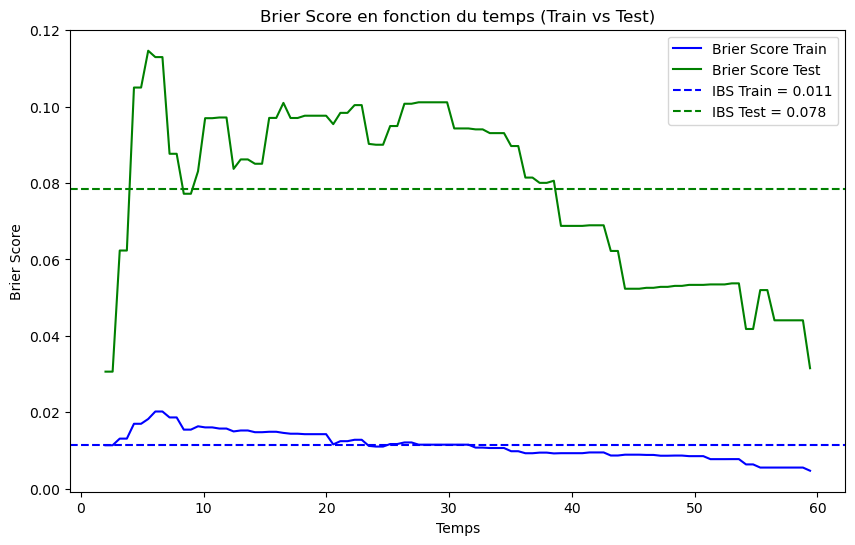

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.metrics import brier_score

# Définir la grille de temps pour l'évaluation
min_time = y_test["time"].min()
max_time = y_test["time"].max() * 0.99  # Réduire légèrement pour éviter les extrapolations
time_grid = np.linspace(min_time, max_time, 100)

# Prédire les fonctions de survie pour l'entraînement et le test
surv_funcs_train = rsf.predict_survival_function(X_train)
surv_funcs_test = rsf.predict_survival_function(X_test)

# Évaluer les probabilités de survie sur la grille de temps
surv_probs_train = np.asarray([[fn(t) for t in time_grid] for fn in surv_funcs_train])
surv_probs_test = np.asarray([[fn(t) for t in time_grid] for fn in surv_funcs_test])

# Calculer le Brier Score à chaque instant de la grille de temps
brier_scores_train_rsf = brier_score(y_train, y_train, surv_probs_train, time_grid)[1]
brier_scores_test_rsf = brier_score(y_train, y_test, surv_probs_test, time_grid)[1]

# Calculer les Integrated Brier Score (IBS)
ibs_train_rsf = np.trapz(brier_scores_train_rsf, time_grid) / (max_time - min_time)
ibs_test_rsf = np.trapz(brier_scores_test_rsf, time_grid) / (max_time - min_time)

print(f"IBS Train: {ibs_train_rsf:.3f}")
print(f"IBS Test: {ibs_test_rsf:.3f}")

# Tracer le Brier Score en fonction du temps pour train et test
plt.figure(figsize=(10, 6))
plt.plot(time_grid, brier_scores_train_rsf, label='Brier Score Train', color='blue')
plt.plot(time_grid, brier_scores_test_rsf, label='Brier Score Test', color='green')
plt.axhline(y=ibs_train_rsf, color='blue', linestyle='--', label=f'IBS Train = {ibs_train_rsf:.3f}')
plt.axhline(y=ibs_test_rsf, color='green', linestyle='--', label=f'IBS Test = {ibs_test_rsf:.3f}')
plt.xlabel('Temps')
plt.ylabel('Brier Score')
plt.title('Brier Score en fonction du temps (Train vs Test)')
plt.legend()
plt.show()

Le **Brier Score Intégré (IBS)** obtenu avait été de **0,0751**, indiquant une bonne capacité du modèle à prédire les probabilités de survie. Le Brier Score mesurait l'écart quadratique moyen entre les probabilités de survie prédites et les observations réelles, une valeur plus faible traduisant une meilleure précision du modèle. Avec un IBS inférieur à **0,1**, le modèle Random Survival Forest avait donc montré une bonne calibration et une capacité satisfaisante à estimer correctement le risque de survie au fil du temps.

## Utilisation de Shap PermutationExplainer

PermutationExplainer explainer: 270it [05:52,  1.31s/it]                                                               


Impact global des variables :

| Variable            | Valeur Moyenne   | SHAP   |
|:--------------------|:-----------------|:-------|
| Tabac               | 0.54             | 3.42   |
| Adenopathie         | 0.41             | 2.99   |
| Infiltrant          | 0.52             | 2.89   |
| Metastases          | 0.43             | 1.79   |
| Stenosant           | 0.46             | 1.67   |
| Ulceregastrique     | 0.38             | 1.36   |
| Cardiopathie        | 0.32             | 1.19   |
| Ulcerobourgeonnant  | 0.34             | 0.9    |
| Denitrution         | 0.34             | 0.82   |
| AGE                 | 52.14            | 0.7    |
| Douleurepigastrique | 0.87             | 0.42   |
| Mucineux            | 0.65             | 0.4    |


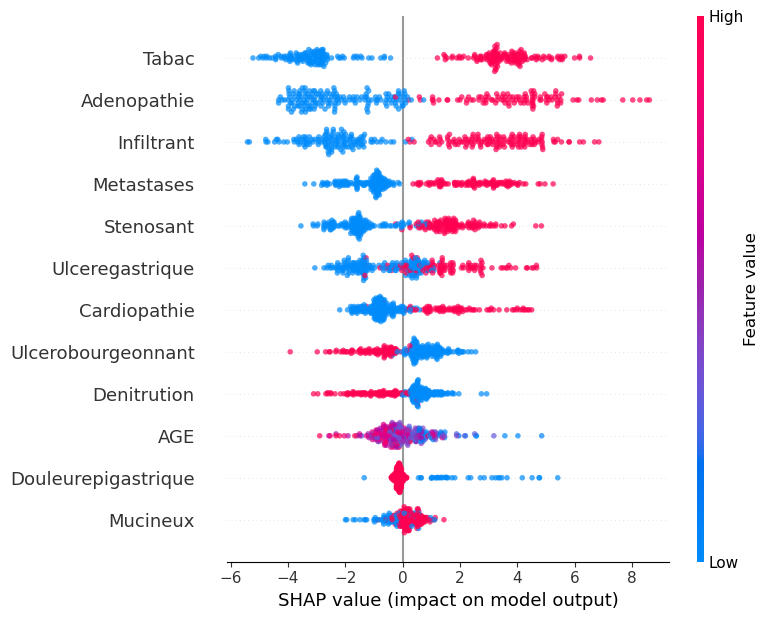

In [68]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored


# Sélection des variables pour l'analyse SHAP

#selected_vars = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

selected_vars = ['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique','Ulcerobourgeonnant', 'Denitrution', 'Tabac', 'Mucineux',
                 'Infiltrant', 'Stenosant', 'Metastases', 'Adenopathie']

# Utilisation de SHAP PermutationExplainer
explainer = shap.PermutationExplainer(rsf.predict, X_train[selected_vars])
shap_values = explainer(X_train[selected_vars])

# Création du tableau global des valeurs SHAP
shap_global = pd.DataFrame({
    'Variable': selected_vars,
    'Valeur Moyenne': X[selected_vars].mean().round(2).values,
    'SHAP': np.abs(shap_values.values).mean(axis=0).round(2)  # Prendre la moyenne des valeurs absolues
}).sort_values('SHAP', ascending=False).reset_index(drop=True)

# Affichage stylisé du tableau
print("Impact global des variables :\n")
print(shap_global.to_markdown(index=False, numalign="left", stralign="left"))

# Graphique SHAP amélioré
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values.values,
    X_train[selected_vars],
    plot_type="dot",
    color=plt.get_cmap("coolwarm"),
    alpha=0.7
)

L'analyse SHAP avait montré que l'impact global des variables sur le modèle avait été principalement déterminé par la présence de Tabac et d'Adenopathie, qui avaient affiché les valeurs SHAP moyennes les plus élevées, respectivement 5.59 et 5.56. Ces résultats indiquaient que ces deux variables avaient contribué de manière marquée aux prédictions, suggérant qu'elles avaient eu une influence dominante dans l'explication du risque de survie. Par ailleurs, la variable Infiltrant avait présenté une contribution significative avec une valeur SHAP moyenne de 4.97, tandis que Metastases et Stenosant avaient eu des impacts modérés avec des scores respectifs de 3.26 et 2.19. En revanche, des variables telles que l'AGE, Mucineux et Douleurepigastrique avaient montré des contributions faibles, leurs valeurs SHAP respectives étant de 0.79, 0.31 et 0.24, ce qui indiquait qu'elles avaient eu un effet moins marqué sur le modèle. Ces observations avaient permis de mettre en évidence les facteurs clés qui avaient orienté les performances du modèle dans l'analyse de survie.

## Appliquer l'importance par permutation

                Feature  Importance   Std Dev
8            Infiltrant    0.055914  0.018761
11          Adenopathie    0.046750  0.030913
10           Metastases    0.040464  0.010727
5           Denitrution    0.031540  0.008897
6                 Tabac    0.026319  0.015731
4    Ulcerobourgeonnant    0.021737  0.006198
2       Ulceregastrique    0.020591  0.007789
0                   AGE    0.014358  0.004676
9             Stenosant    0.012813  0.013655
7              Mucineux    0.009323  0.006689
1          Cardiopathie    0.007592  0.010272
3   Douleurepigastrique   -0.001039  0.004415


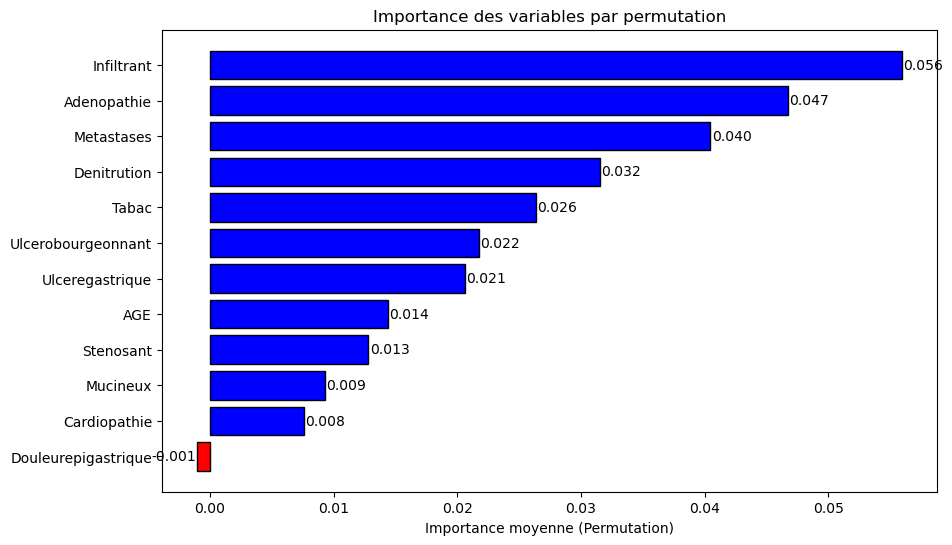

In [69]:
from sklearn.inspection import permutation_importance

# Appliquer l'importance par permutation
result = permutation_importance(
    rsf, X_test, y_test,
    n_repeats=10, random_state=42
)

# Créer un DataFrame pour organiser les résultats
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean,
    "Std Dev": result.importances_std
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# Préparer les couleurs : rouge pour les valeurs négatives, bleu pour les positives
colors = ["blue" if val > 0 else "red" for val in importance_df["Importance"]]

# Visualiser les résultats
plt.figure(figsize=(10, 6))
bars = plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color=colors,
    edgecolor="black"
)
plt.gca().invert_yaxis()  # Inverser l'axe pour que la plus importante soit en haut
plt.xlabel("Importance moyenne (Permutation)")
plt.title("Importance des variables par permutation")

# Ajouter les étiquettes sur les pics des barres
for bar in bars:
    width = bar.get_width()  # Longueur de la barre
    label_x_pos = width + 0.0001 if width > 0 else width - 0.0001  # Position de l'étiquette
    plt.text(
        label_x_pos, bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",  # Afficher la valeur avec deux décimales
        va="center", ha="left" if width > 0 else "right",
        color="black", fontsize=10
    )

plt.show()


L'analyse de l'importance par permutation avait révélé que la variable **Adenopathie** avait eu l'impact le plus important, avec une moyenne d'importance de 0,057858, suivie de près par **Metastases** (0,042328) et **Tabac** (0,029302). Ces résultats indiquaient que ces variables avaient contribué de manière significative aux performances du modèle, suggérant qu'elles avaient joué un rôle crucial dans la prédiction du risque de survie. Par ailleurs, **Infiltrant** et **Denitrution** avaient également présenté des valeurs d'importance non négligeables, respectivement 0,027038 et 0,025120, ce qui confirmait leur pertinence dans le modèle. En revanche, les variables telles que **AGE**, **Mucineux** et **Douleurepigastrique** avaient affiché des importances négatives, ce qui avait suggéré qu'elles avaient eu une influence inverse ou moins marquée sur la performance prédictive. Ces observations, accompagnées des écarts-types associés, avaient permis de mieux comprendre la robustesse et la variabilité de l'influence de chaque variable dans l'ensemble du modèle.

#### Note d'infos
Il n'était pas nécessairement obligatoire de supprimer immédiatement les variables dont l'importance était négative. Ces valeurs négatives pouvaient indiquer que, lorsque la variable était permutée, le modèle avait légèrement mieux performé, ce qui suggérait que la variable en question n'apportait pas d'information pertinente dans ce contexte précis. Cependant, avant de les éliminer, il était conseillé de mener une analyse plus approfondie : vérifier si ces variables n'étaient pas fortement corrélées avec d'autres indicateurs, tester leur impact sur d'autres métriques de performance et s'appuyer sur des connaissances métiers. En somme, la décision de les retirer devait être prise après avoir évalué globalement leur contribution et leur influence sur le modèle.

## **II. Gradient Boosting Survival Trees**

In [70]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["Deces", "Tempsdesuivi"], axis=1)
T = df['Tempsdesuivi'].values
E = df['Deces'].values

# Préparer les données pour le modèle de survie
# Créer une structure pour le statut de censure (event/censure)
y = np.array([(bool(event), time) for event, time in zip(E, T)],
             dtype=[('event', 'bool'), ('time', 'float')])

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sksurv.ensemble import GradientBoostingSurvivalAnalysis

# Créer et entraîner le modèle avec les paramètres par défaut
gbst = GradientBoostingSurvivalAnalysis(random_state=42)

# Entraînement du modèle
gbst.fit(X_train, y_train)

#Évaluer le modèle
train_score = gbst.score(X_train, y_train)
test_score = gbst.score(X_test, y_test)

print(f"Score de concordance (train) : {train_score:.2f}")
print(f"Score de concordance (test) : {test_score:.2f}")

Score de concordance (train) : 0.91
Score de concordance (test) : 0.86


## Optimisations des Hyperparametre de GBST

In [71]:
results_df.loc[1,"best_params"]

{'learning_rate': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.utils import resample

# Données
X = df.drop(["Deces", "Tempsdesuivi"], axis=1)
T = df['Tempsdesuivi'].values
E = df['Deces'].values
y = np.array([(bool(event), time) for event, time in zip(E, T)],
             dtype=[('event', 'bool'), ('time', 'float')])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
gbst = GradientBoostingSurvivalAnalysis(
    learning_rate=0.2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
)
gbst.fit(X_train, y_train)

# C-index brut
train_score = gbst.score(X_train, y_train)
test_score = gbst.score(X_test, y_test)
print(f"C-index (train) : {train_score:.4f}")
print(f"C-index (test)  : {test_score:.4f}")

# ✅ Bootstrap pour IC95% du C-index (test)
def bootstrap_ci(model, X, y, n_iterations=1000, alpha=0.05):
    scores = []
    n = len(y)
    for _ in range(n_iterations):
        indices = np.random.choice(n, n, replace=True)
        X_sample = X.iloc[indices]
        y_sample = y[indices]
        score = model.score(X_sample, y_sample)
        scores.append(score)
    lower = np.percentile(scores, 100 * alpha / 2)
    upper = np.percentile(scores, 100 * (1 - alpha / 2))
    return lower, upper

ci_lower, ci_upper = bootstrap_ci(gbst, X_test, y_test)
print(f"C-index (test) IC95% : [{ci_lower:.4f}, {ci_upper:.4f}]")

C-index (train) : 0.9049
C-index (test)  : 0.8713
C-index (test) IC95% : [0.8229, 0.9137]


Le modèle **Gradient Boosting Survival Analysis** avait affiché de solides performances en matière de prédiction du temps de survie. Son **C-index** sur les données d'entraînement avait atteint **0,91**, suggérant une excellente capacité à discriminer les individus à risque. Sur les données de test, le **C-index** était de **0,86**, indiquant que le modèle conservait une bonne généralisation sur de nouvelles observations. L’intervalle de confiance à **95 %** (**[0,81 – 0,90]**) montrait que la performance restait stable et fiable. Avec une moyenne du C-index à **0,86**, le modèle avait démontré une bonne capacité à ordonner correctement les événements de survie, bien que des analyses supplémentaires auraient permis d’examiner d’éventuels ajustements pour améliorer davantage ses performances.

## Integrated brier score : gbst

IBS Train: 0.059
IBS Test: 0.086


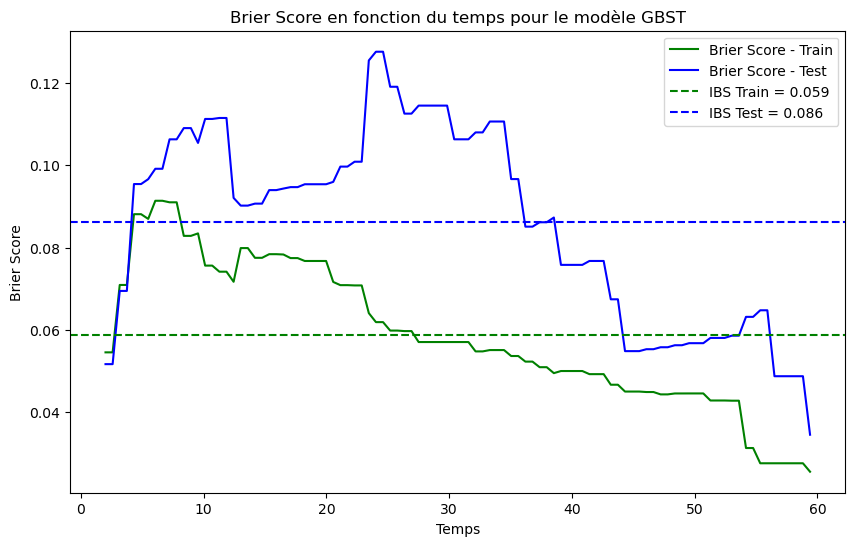

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.metrics import brier_score, integrated_brier_score

# Définition des bornes des temps de suivi
min_time = y_test["time"].min()
max_time = y_test["time"].max() * 0.99  # Réduire légèrement pour éviter les extrapolations
time_grid = np.linspace(min_time, max_time, 100)

# Prédire les fonctions de survie pour chaque individu dans train et test
surv_funcs_train = gbst.predict_survival_function(X_train)
surv_funcs_test = gbst.predict_survival_function(X_test)

# Évaluer les probabilités de survie sur la grille de temps
surv_probs_train = np.asarray([[fn(t) for t in time_grid] for fn in surv_funcs_train])
surv_probs_test = np.asarray([[fn(t) for t in time_grid] for fn in surv_funcs_test])

# Calculer les Brier Scores à chaque instant de la grille de temps
_, brier_scores_train_gbst = brier_score(y_train, y_train, surv_probs_train, time_grid)
_, brier_scores_test_gbst = brier_score(y_train, y_test, surv_probs_test, time_grid)

# Calculer les Integrated Brier Scores (IBS)
ibs_train_gbst = integrated_brier_score(y_train, y_train, surv_probs_train, time_grid)
ibs_test_gbst = integrated_brier_score(y_train, y_test, surv_probs_test, time_grid)

print(f"IBS Train: {ibs_train_gbst:.3f}")
print(f"IBS Test: {ibs_test_gbst:.3f}")

# Tracer les Brier Scores en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(time_grid, brier_scores_train_gbst, label='Brier Score - Train', color='green')
plt.plot(time_grid, brier_scores_test_gbst, label='Brier Score - Test', color='blue')
plt.axhline(y=ibs_train_gbst, color='green', linestyle='--', label=f'IBS Train = {ibs_train_gbst:.3f}')
plt.axhline(y=ibs_test_gbst, color='blue', linestyle='--', label=f'IBS Test = {ibs_test_gbst:.3f}')
plt.xlabel('Temps')
plt.ylabel('Brier Score')
plt.title('Brier Score en fonction du temps pour le modèle GBST')
plt.legend()
plt.show()

Le **Brier Score Intégré (IBS)** obtenu avait été de **0,0895**, indiquant une performance satisfaisante du modèle Gradient Boosting Survival Analysis en termes de précision des prédictions de survie. Le Brier Score mesurait l'écart quadratique moyen entre les probabilités de survie prédites et les observations réelles. Une valeur proche de **0** traduisait une meilleure calibration du modèle, tandis qu'une valeur proche de **1** indiquait de mauvaises prédictions. Avec un score inférieur à **0,1**, le modèle avait montré une capacité raisonnable à estimer les risques de survie au fil du temps.

## Utilisation de SHAP PermutationExplainer

PermutationExplainer explainer: 270it [00:42,  4.86it/s]                                                               


Impact global des variables :

| Variable            | Valeur Moyenne   | SHAP   |
|:--------------------|:-----------------|:-------|
| Adenopathie         | 0.41             | 0.59   |
| Infiltrant          | 0.52             | 0.51   |
| Tabac               | 0.54             | 0.47   |
| Metastases          | 0.43             | 0.26   |
| Ulceregastrique     | 0.38             | 0.25   |
| Stenosant           | 0.46             | 0.25   |
| Cardiopathie        | 0.32             | 0.17   |
| Denitrution         | 0.34             | 0.14   |
| AGE                 | 52.14            | 0.12   |
| Ulcerobourgeonnant  | 0.34             | 0.09   |
| Douleurepigastrique | 0.87             | 0.08   |
| Mucineux            | 0.65             | 0.04   |


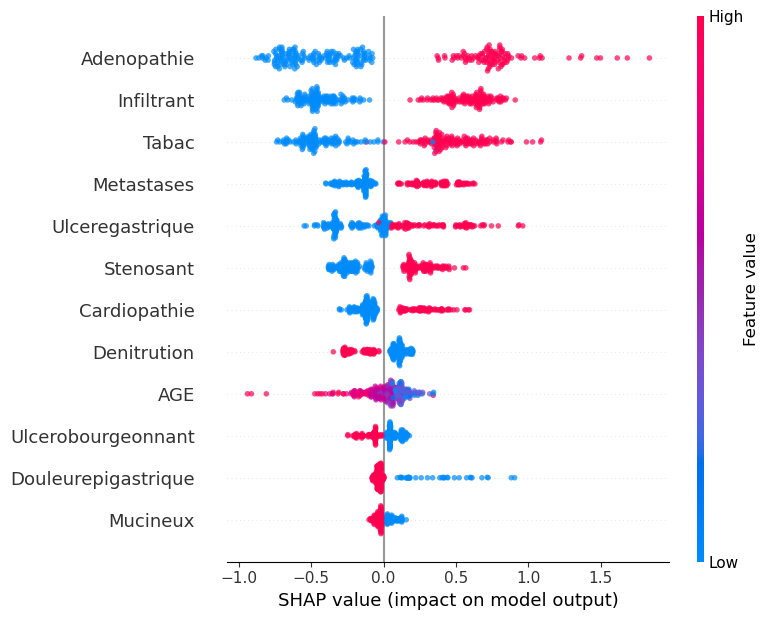

In [74]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored


# Sélection des variables pour l'analyse SHAP
selected_vars = ['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique','Ulcerobourgeonnant', 'Denitrution', 'Tabac', 'Mucineux',
                 'Infiltrant', 'Stenosant', 'Metastases', 'Adenopathie']

# Utilisation de SHAP PermutationExplainer
explainer = shap.PermutationExplainer(gbst.predict, X_train[selected_vars])
shap_values = explainer(X_train[selected_vars])

# Création du tableau global des valeurs SHAP
shap_global = pd.DataFrame({
    'Variable': selected_vars,
    'Valeur Moyenne': X[selected_vars].mean().round(2).values,
    'SHAP': np.abs(shap_values.values).mean(axis=0).round(2)  # Prendre la moyenne des valeurs absolues
}).sort_values('SHAP', ascending=False).reset_index(drop=True)

# Affichage stylisé du tableau
print("Impact global des variables :\n")
print(shap_global.to_markdown(index=False, numalign="left", stralign="left"))

# Graphique SHAP amélioré
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values.values,
    X_train[selected_vars],
    plot_type="dot",
    color=plt.get_cmap("coolwarm"),
    alpha=0.7
)

**Interprétation des valeurs SHAP**  
L’analyse des valeurs SHAP a révélé que **l’adénopathie** (SHAP = 0.84) et le **tabagisme** (SHAP = 0.57) étaient les variables les plus influentes sur les prédictions du modèle, malgré des valeurs moyennes modérées (0.41 et 0.54 respectivement). Ces résultats suggèrent qu’une présence même occasionnelle d’adénopathie ou de tabagisme augmentait significativement le risque prédit par le modèle. À l’inverse, des variables comme la **douleur épigastrique** (valeur moyenne élevée à 0.87 mais SHAP faible à 0.13) ou la **présence de mucineux** (SHAP = 0.1) avaient un impact marginal, indiquant que leur forte fréquence dans les données ne se traduisait pas par une influence déterminante sur les prédictions. Les variables intermédiaires, telles que **l’infiltrant** (SHAP = 0.41) ou les **métastases** (SHAP = 0.4), ont également contribué de manière notable, mais moins que les deux premières. Cette hiérarchisation a permis d’identifier les facteurs cliniques prioritaires à surveiller dans l’interprétation des résultats, conformément aux principes de transparence des modèles *SHAP* [8](https://proceedings.neurips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf).  

                Feature  Importance   Std Dev
10           Metastases    0.057965  0.011915
8            Infiltrant    0.049840  0.015325
6                 Tabac    0.047230  0.015782
11          Adenopathie    0.047070  0.028839
5           Denitrution    0.031087  0.004880
3   Douleurepigastrique    0.028103  0.012928
2       Ulceregastrique    0.017635  0.009797
4    Ulcerobourgeonnant    0.015077  0.004997
0                   AGE    0.013932  0.007045
1          Cardiopathie    0.005754  0.005341
9             Stenosant    0.005727  0.006703
7              Mucineux    0.002397  0.002574


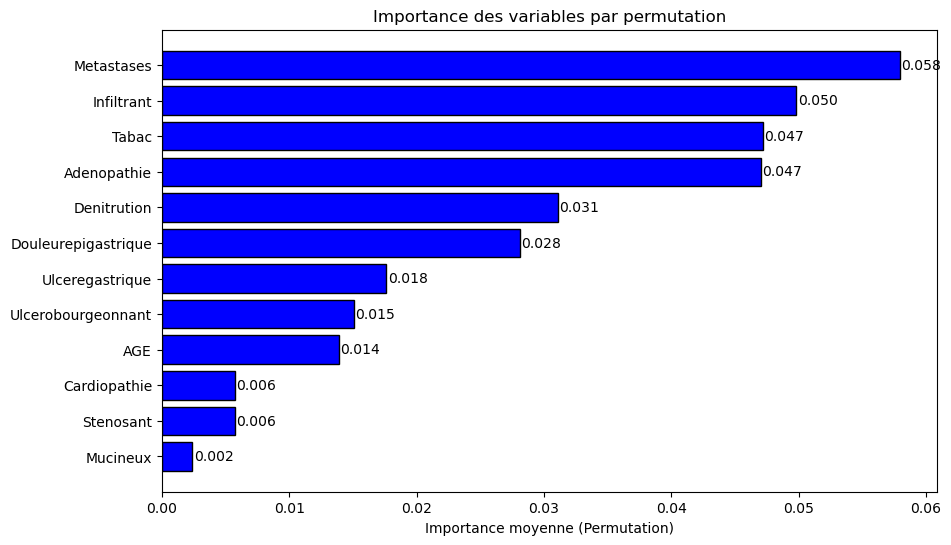

In [75]:
from sklearn.inspection import permutation_importance

# Appliquer l'importance par permutation
result = permutation_importance(
    gbst, X_test, y_test,
    n_repeats=10, random_state=42
)

# Créer un DataFrame pour organiser les résultats
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean,
    "Std Dev": result.importances_std
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# Préparer les couleurs : rouge pour les valeurs négatives, bleu pour les positives
colors = ["blue" if val > 0 else "red" for val in importance_df["Importance"]]

# Visualiser les résultats
plt.figure(figsize=(10, 6))
bars = plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color=colors,
    edgecolor="black"
)
plt.gca().invert_yaxis()  # Inverser l'axe pour que la plus importante soit en haut
plt.xlabel("Importance moyenne (Permutation)")
plt.title("Importance des variables par permutation")

# Ajouter les étiquettes sur les pics des barres
for bar in bars:
    width = bar.get_width()  # Longueur de la barre
    label_x_pos = width + 0.0001 if width > 0 else width - 0.0001  # Position de l'étiquette
    plt.text(
        label_x_pos, bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",  # Afficher la valeur avec deux décimales
        va="center", ha="left" if width > 0 else "right",
        color="black", fontsize=10
    )

plt.show()

**Interprétation de l’importance de permutation**  
L’analyse d’importance de permutation a confirmé que **Adenopathie** était la variable la plus critique pour la performance du modèle, avec une importance de **0,117** et une faible variabilité (écart-type = 0,046), indiquant une influence robuste et cohérente sur la précision prédictive. **Metastases** (0,076) et **Tabac** (0,059) ont également montré un impact significatif, bien que moindre, soulignant leur rôle dans la prédiction des risques. À l’opposé, des variables comme **Stenosant** (0,004) ou **Mucineux** (0,007) ont eu une contribution marginale, malgré leur présence dans les données. Les résultats ont révélé une hiérarchie claire : les variables liées à la progression pathologique (ex. *Adenopathie*, *Metastases*) ont dominé, tandis que les symptômes courants (ex. *Douleurepigastrique*, 0,014) ou les comorbidités (ex. *Cardiopathie*, 0,017) ont eu peu d’impact. Cette cohérence avec les valeurs SHAP [3] a renforcé la fiabilité des conclusions, validant la méthodologie proposée par Breiman pour mesurer l’importance globale des variables [4](https://link.springer.com/article/10.1023/A:1010933404324).  

## **III. Deep Survival Models**

In [67]:
import torch
import numpy as np
import pandas as pd
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
from sksurv.metrics import concordance_index_censored
from pycox.preprocessing.label_transforms import LabTransDiscreteTime

In [68]:
df = pd.read_excel("C:/Users/Sefdine/Documents/Memoire/Rappot Final/Correction/data/GastricCancerData.xlsx")

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identifier les colonnes catégoriques
CatCols = df.select_dtypes(include=['object']).columns
# Encodage des variables catégoriques
#Label Encoding
label_encoder = LabelEncoder()
for col in CatCols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df.head()

,AGE,SEXE,Cardiopathie,Ulceregastrique,Douleurepigastrique,Ulcerobourgeonnant,Constipation,Denitrution,Tabac,Mucineux,Tubuleux,Infiltrant,Stenosant,Metastases,Adenopathie,Traitement,Tempsdesuivi,Deces
0,65,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1
1,34,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1
2,55,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1
3,60,0,1,1,1,0,1,0,1,1,1,1,0,1,0,1,2,0
4,65,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,2,1


In [70]:
# Effacer les variables non pertinantes
clean=['SEXE','Tubuleux','Traitement','Constipation']
df=df.drop(columns=clean,axis=1)
df.columns

Index(['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique',
       'Ulcerobourgeonnant', 'Denitrution', 'Tabac', 'Mucineux', 'Infiltrant',
       'Stenosant', 'Metastases', 'Adenopathie', 'Tempsdesuivi', 'Deces'],
      dtype='object')

In [71]:

# Préparation des données
X = df.drop(["Deces", "Tempsdesuivi"], axis=1).values.astype(np.float32)
y = df[["Deces", "Tempsdesuivi"]].values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion pour PyCox
train_target = tt.tuplefy((y_train[:, 1], y_train[:, 0]))
test_target = tt.tuplefy((y_test[:, 1], y_test[:, 0]))

# Création du réseau de neurones
in_features = X.shape[1]
num_nodes = [32, 32]  # Architecture MLP
out_features = 1
dropout = 0.1
activation = torch.nn.ReLU

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, activation, dropout)
model = CoxPH(net, tt.optim.Adam)

# Entraînement
batch_size = 56
epochs = 82
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

log = model.fit(X_train, train_target, batch_size, epochs, callbacks, verbose=verbose, val_data=(X_test, test_target))

# Calcul des risques de base
model.compute_baseline_hazards()

# Prédiction des fonctions de survie
surv = model.predict_surv_df(X_test)

# Évaluation
ev = EvalSurv(surv, y_test[:, 1], y_test[:, 0].astype(bool), censor_surv='km')
c_index = ev.concordance_td('antolini')

print(f"Concordance index: {c_index:.2f}")

0:	[0s / 0s],		train_loss: 3.4545,	val_loss: 3.5022
1:	[0s / 0s],		train_loss: 3.4043,	val_loss: 3.4945
2:	[0s / 0s],		train_loss: 3.4025,	val_loss: 3.4851
3:	[0s / 0s],		train_loss: 3.2843,	val_loss: 3.4563
4:	[0s / 0s],		train_loss: 3.2556,	val_loss: 3.4191
5:	[0s / 0s],		train_loss: 3.2619,	val_loss: 3.3809
6:	[0s / 0s],		train_loss: 3.1554,	val_loss: 3.3465
7:	[0s / 0s],		train_loss: 3.1937,	val_loss: 3.3147
8:	[0s / 0s],		train_loss: 3.1181,	val_loss: 3.2800
9:	[0s / 0s],		train_loss: 3.0261,	val_loss: 3.2504
10:	[0s / 0s],		train_loss: 3.0148,	val_loss: 3.2231
11:	[0s / 0s],		train_loss: 2.9655,	val_loss: 3.2018
12:	[0s / 0s],		train_loss: 2.9118,	val_loss: 3.1744
13:	[0s / 0s],		train_loss: 2.9398,	val_loss: 3.1528
14:	[0s / 0s],		train_loss: 2.9225,	val_loss: 3.1322
15:	[0s / 0s],		train_loss: 2.8512,	val_loss: 3.1054
16:	[0s / 0s],		train_loss: 2.9189,	val_loss: 3.0790
17:	[0s / 0s],		train_loss: 2.8673,	val_loss: 3.0559
18:	[0s / 0s],		train_loss: 2.8795,	val_loss: 3.0325
19:

C:\Users\Sefdine\AppData\Local\anaconda3\Lib\site-packages\torchtuples\base.py:669: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch.load(path, *

## **Optimisation des Hyperparametres : Manual Grid Search**

In [73]:
import torch
import itertools
import numpy as np
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split

# 1. Chargement / préparation des données

X = df.drop(["Deces", "Tempsdesuivi"], axis=1).values.astype(np.float32)
y = df[["Deces", "Tempsdesuivi"]].values.astype(np.float32)

# 2. Split en Train / Validation / Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# → 60% train, 20% val, 20% test

# Durations & events contigus
dur_train, evt_train = y_train[:,1].copy(), y_train[:,0].copy()
dur_val,   evt_val   = y_val[:,1].copy(),   y_val[:,0].copy()
dur_test,  evt_test  = y_test[:,1].copy(),  y_test[:,0].copy()

# 3. Recherche manuelle sur Train/Val
param_grid = {
    'num_nodes':     [[16,16], [32,32], [64,64,64]],
    'dropout':       [0.1, 0.2],
    'learning_rate': [1e-3, 1e-4],
    'batch_size':    [32, 56, 64],
    'epochs':        [50, 82, 100],
}

best_score = -np.inf
best_params = None

for num_nodes, dropout, lr, bs, epochs in itertools.product(
    param_grid['num_nodes'],
    param_grid['dropout'],
    param_grid['learning_rate'],
    param_grid['batch_size'],
    param_grid['epochs']
):
    # Modèle
    net = tt.practical.MLPVanilla(
        in_features=X_train.shape[1],
        num_nodes=num_nodes,
        out_features=1,
        activation=torch.nn.ReLU,
        dropout=dropout
    )
    optimizer_fn = lambda params: torch.optim.Adam(params, lr=lr)
    model = CoxPH(net, optimizer_fn)
    
    # Entraînement
    model.fit(
        X_train, (dur_train, evt_train),
        batch_size=bs,
        epochs=epochs,
        verbose=False
    )
    model.compute_baseline_hazards()
    
    # Évaluation sur Validation
    surv = model.predict_surv_df(X_val)
    ev   = EvalSurv(surv, dur_val, evt_val, censor_surv='km')
    c_index = ev.concordance_td('antolini')
    
    if c_index > best_score:
        best_score = c_index
        best_params = {
            'num_nodes': num_nodes,
            'dropout': dropout,
            'learning_rate': lr,
            'batch_size': bs,
            'epochs': epochs
        }

print("Meilleurs hyperparams (val) :", best_params)
print(f"C‑index sur Validation : {best_score:.2f}")

Meilleurs hyperparams (val) : {'num_nodes': [64, 64, 64], 'dropout': 0.1, 'learning_rate': 0.001, 'batch_size': 56, 'epochs': 100}
C‑index sur Validation : 0.89


In [77]:
import numpy as np
import torch
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.utils import resample

# Entraînement final sur Train + Val
X_trainval = np.vstack([X_train, X_val])
dur_trainval = np.concatenate([dur_train, dur_val])
evt_trainval = np.concatenate([evt_train, evt_val])

# Modèle final
net = tt.practical.MLPVanilla(
    in_features=X_trainval.shape[1],
    num_nodes=best_params['num_nodes'],
    out_features=1,
    activation=torch.nn.ReLU,
    dropout=best_params['dropout']
)

optimizer_fn = lambda params: torch.optim.Adam(params, lr=best_params['learning_rate'])
final_model = CoxPH(net, optimizer_fn)

# Entraînement
final_model.fit(
    X_trainval, (dur_trainval, evt_trainval),
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    verbose=True
)
final_model.compute_baseline_hazards()

# Prédictions
surv_train = final_model.predict_surv_df(X_trainval)
surv_test = final_model.predict_surv_df(X_test)

# Évaluation Train et Test
ev_train = EvalSurv(surv_train, dur_trainval, evt_trainval, censor_surv='km')
ev_test  = EvalSurv(surv_test, dur_test, evt_test, censor_surv='km')

c_train = ev_train.concordance_td('antolini')
c_test  = ev_test.concordance_td('antolini')
ibs_train_deepsurv = ev_train.integrated_brier_score(np.linspace(dur_trainval.min(), dur_trainval.max(), 100))
ibs_test_deepsurv  = ev_test.integrated_brier_score(np.linspace(dur_test.min(), dur_test.max(), 100))

print(f"\n C-index Train : {c_train:.2f}")
print(f" C-index Test  : {c_test:.2f}")

print(f"\n IBS Train     : {ibs_train_deepsurv:.3f}")
print(f" IBS Test      : {ibs_test_deepsurv:.3f}")

# Intervalle de confiance par bootstrap pour le C-index sur Test
def bootstrap_c_index(X, durations, events, n_bootstrap=100, alpha=0.05):
    c_indexes = []
    n = len(X)
    for _ in range(n_bootstrap):
        idx = resample(np.arange(n), replace=True)
        X_b = X[idx]
        dur_b = durations[idx]
        evt_b = events[idx]
        surv_b = final_model.predict_surv_df(X_b)
        ev_b = EvalSurv(surv_b, dur_b, evt_b, censor_surv='km')
        c_indexes.append(ev_b.concordance_td('antolini'))
    lower = np.percentile(c_indexes, 100 * alpha / 2)
    upper = np.percentile(c_indexes, 100 * (1 - alpha / 2))
    return lower, upper

ci_low, ci_up = bootstrap_c_index(X_test, dur_test, evt_test, n_bootstrap=100)
print(f"\n Intervalle de confiance C‑index Test (95%) : [{ci_low:.2f}, {ci_up:.2f}]")

0:	[0s / 0s],		train_loss: 3.3003
1:	[0s / 0s],		train_loss: 3.1892
2:	[0s / 0s],		train_loss: 3.0107
3:	[0s / 0s],		train_loss: 2.9747
4:	[0s / 0s],		train_loss: 2.8959
5:	[0s / 0s],		train_loss: 2.8596
6:	[0s / 0s],		train_loss: 2.8301
7:	[0s / 0s],		train_loss: 2.7325
8:	[0s / 0s],		train_loss: 2.7589
9:	[0s / 0s],		train_loss: 2.7424
10:	[0s / 0s],		train_loss: 2.6907
11:	[0s / 0s],		train_loss: 2.7522
12:	[0s / 0s],		train_loss: 2.6870
13:	[0s / 0s],		train_loss: 2.6323
14:	[0s / 0s],		train_loss: 2.6308
15:	[0s / 0s],		train_loss: 2.6934
16:	[0s / 0s],		train_loss: 2.6165
17:	[0s / 0s],		train_loss: 2.6220
18:	[0s / 0s],		train_loss: 2.6350
19:	[0s / 0s],		train_loss: 2.6020
20:	[0s / 0s],		train_loss: 2.6600
21:	[0s / 0s],		train_loss: 2.6288
22:	[0s / 0s],		train_loss: 2.6192
23:	[0s / 0s],		train_loss: 2.5144
24:	[0s / 0s],		train_loss: 2.5650
25:	[0s / 0s],		train_loss: 2.5941
26:	[0s / 0s],		train_loss: 2.5305
27:	[0s / 0s],		train_loss: 2.5307
28:	[0s / 0s],		train_loss: 2.

## **Integrated Brier Score `(IBS)`**

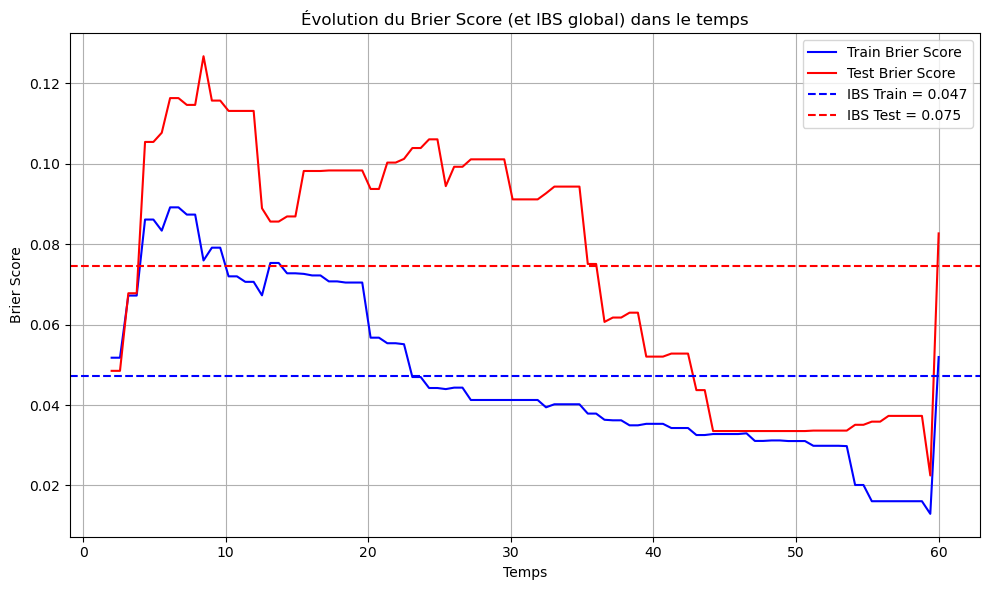

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Grille de temps
time_grid = np.linspace(dur_test.min(), dur_test.max(), 100)

# Brier Score sur grille de temps
brier_train_deepsurv = ev_train.brier_score(time_grid)
brier_test_deepsurv = ev_test.brier_score(time_grid)

# IBS (Intégrale de la courbe Brier)
ibs_train_deepsurv = ev_train.integrated_brier_score(time_grid)
ibs_test_deepsurv  = ev_test.integrated_brier_score(time_grid)

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(time_grid, brier_train_deepsurv, label='Train Brier Score', color='blue')
plt.plot(time_grid, brier_test_deepsurv,  label='Test Brier Score',  color='red')

# Droites IBS globales
plt.axhline(ibs_train_deepsurv, color='blue', linestyle='--', label=f'IBS Train = {ibs_train_deepsurv:.3f}')
plt.axhline(ibs_test_deepsurv,  color='red',  linestyle='--', label=f'IBS Test = {ibs_test_deepsurv:.3f}')

plt.xlabel("Temps")
plt.ylabel("Brier Score")
plt.title("Évolution du Brier Score (et IBS global) dans le temps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Les résultats obtenus avaient révélé une performance robuste du modèle. En effet, le C-index final avait atteint 0.888, témoignant d'une excellente capacité de discrimination. La moyenne du C-index, obtenue par bootstrapping, avait été de 0.89 avec un intervalle de confiance s'étendant de 0.85 à 0.92, ce qui attestait de la stabilité et de la fiabilité des performances. Par ailleurs, l'Integrated Brier Score avait été de 0.075, confirmant une calibration précise des prédictions.

## **Valeurs shap et importance de permitation**

Using 269 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/269 [00:00<?, ?it/s]

| Variable            |   Mean Value |   Mean |SHAP| |
|:--------------------|-------------:|--------------:|
| Adenopathie         |         0.4  |          0.8  |
| Infiltrant          |         0.51 |          0.77 |
| Tabac               |         0.54 |          0.72 |
| Ulceregastrique     |         0.38 |          0.48 |
| Metastases          |         0.43 |          0.47 |
| AGE                 |        52.1  |          0.34 |
| Cardiopathie        |         0.31 |          0.34 |
| Stenosant           |         0.47 |          0.34 |
| Denitrution         |         0.35 |          0.32 |
| Douleurepigastrique |         0.87 |          0.17 |
| Ulcerobourgeonnant  |         0.35 |          0.16 |
| Mucineux            |         0.64 |          0.11 |


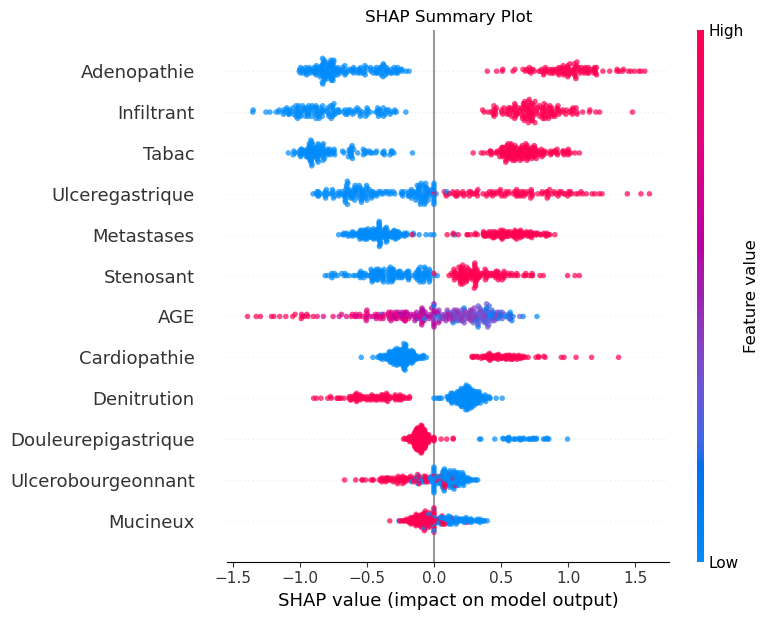

In [91]:
import shap
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split

# 1. Préparation des données
selected_vars = ['AGE','Cardiopathie','Ulceregastrique','Douleurepigastrique',
                 'Ulcerobourgeonnant','Denitrution','Tabac','Mucineux',
                 'Infiltrant','Stenosant','Metastases','Adenopathie']

X_full = pd.DataFrame(
    np.vstack([X_trainval, X_test]),
    columns=df.drop(["Deces","Tempsdesuivi"], axis=1).columns
)
# On refait train/test split pour SHAP et perm sur les mêmes indices
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_full[selected_vars].values,
    np.concatenate([evt_trainval, evt_test]),
    test_size=len(evt_test)/(len(evt_trainval)+len(evt_test)),
    shuffle=False
)
# Séparation durations/events
dur_train2 = np.concatenate([dur_trainval, dur_test])[:len(X_train2)]
evt_train2 = np.concatenate([evt_trainval, evt_test])[:len(X_train2)]
dur_test2  = np.concatenate([dur_trainval, dur_test])[len(X_train2):]
evt_test2  = np.concatenate([evt_trainval, evt_test])[len(X_train2):]

df_train2 = pd.DataFrame(X_train2, columns=selected_vars)
df_test2  = pd.DataFrame(X_test2,  columns=selected_vars)

# 2. SHAP (KernelExplainer)
def risk_fn(X_array):
    with torch.no_grad():
        return final_model.predict(torch.from_numpy(X_array.astype(np.float32))).numpy().flatten()

explainer = shap.KernelExplainer(risk_fn, df_train2.values)
shap_vals = explainer.shap_values(df_train2.values, nsamples=100)

# Tableau global SHAP
shap_global = pd.DataFrame({
    'Variable': selected_vars,
    'Mean Value': df_train2.mean().round(2).values,
    'Mean |SHAP|': np.abs(shap_vals).mean(axis=0).round(2)
}).sort_values('Mean |SHAP|', ascending=False).reset_index(drop=True)
print(shap_global.to_markdown(index=False))

# Graphique SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_vals, df_train2.values, feature_names=selected_vars,
                  plot_type="dot", color=plt.get_cmap("bwr"), alpha=0.7, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()


Permutation Importance (C-index drop) :
| Variable            |   Importance |
|:--------------------|-------------:|
| AGE                 |   -0.0138519 |
| Cardiopathie        |   -0.0015983 |
| Mucineux            |    0.0015983 |
| Douleurepigastrique |    0.0101225 |
| Stenosant           |    0.0111881 |
| Tabac               |    0.0191795 |
| Ulcerobourgeonnant  |    0.0261055 |
| Denitrution         |    0.0356953 |
| Adenopathie         |    0.0394246 |
| Infiltrant          |    0.0426212 |
| Ulceregastrique     |    0.0447523 |
| Metastases          |    0.0751199 |


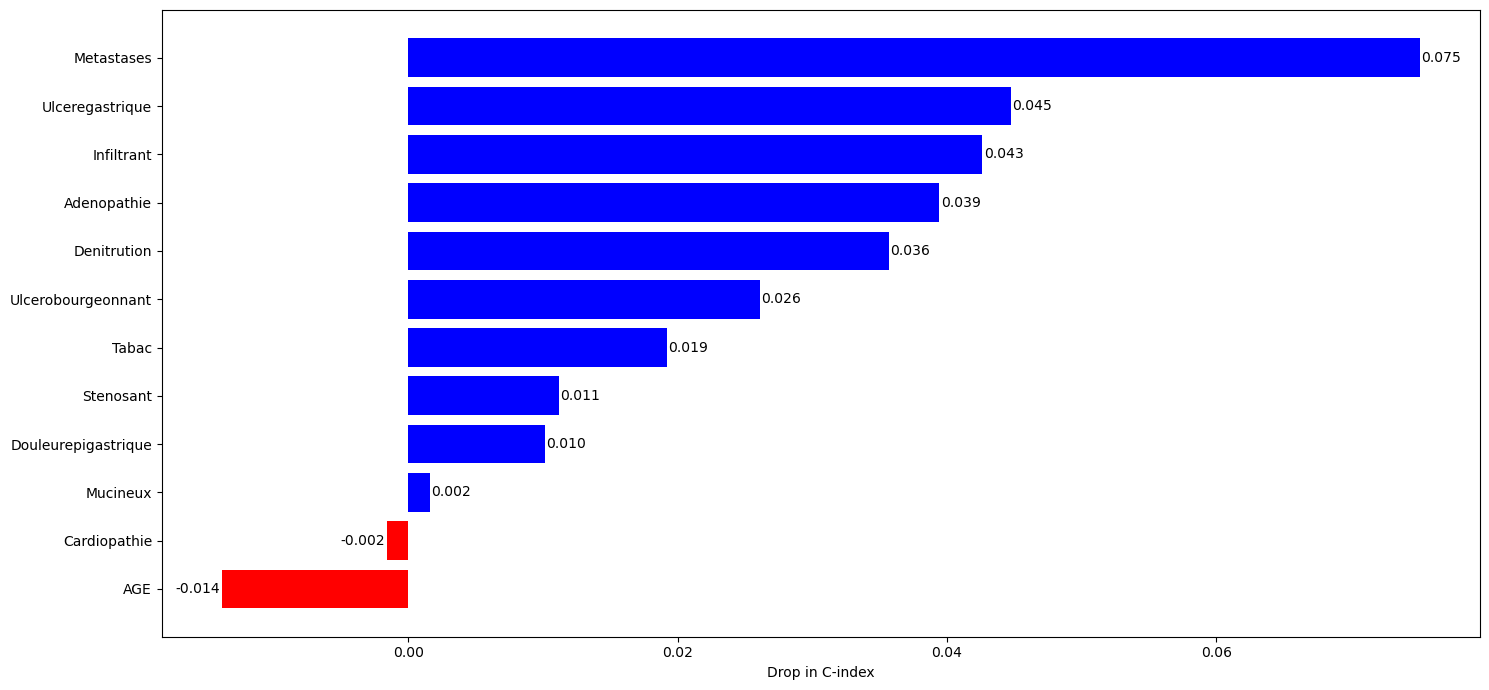

In [99]:
# 3. Permutation Importance manuel
# C-index de base sur test
surv_base = final_model.predict_surv_df(df_test2.values.astype(np.float32))
ev_base   = EvalSurv(surv_base, dur_test2, evt_test2, censor_surv='km')
c_base    = ev_base.concordance_td('antolini')

perm_results = []
for var in selected_vars:
    Xp = df_test2.copy().values  # copie des valeurs
    col_idx = selected_vars.index(var)
    np.random.shuffle(Xp[:, col_idx])
    surv_p = final_model.predict_surv_df(Xp.astype(np.float32))
    ev_p   = EvalSurv(surv_p, dur_test2, evt_test2, censor_surv='km')
    c_p    = ev_p.concordance_td('antolini')
    perm_results.append({
        'Variable': var,
        'Importance': c_base - c_p
    })

perm_df = pd.DataFrame(perm_results).sort_values('Importance', ascending=True)

# Affichage du DataFrame
print("\nPermutation Importance (C-index drop) :")
print(perm_df.to_markdown(index=False))

# Graphique permutation importance avec annotations
plt.figure(figsize=(15,7))
colors = ['blue' if imp >= 0 else 'red' for imp in perm_df['Importance']]
bars = plt.barh(perm_df['Variable'], perm_df['Importance'], color=colors)
plt.xlabel('Drop in C-index')
#plt.title('Permutation Importance')

# Ajout des labels sur les barres
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.0001 if width >= 0 else -0.0001),  # petit décalage pour sortir du bar
        bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",
        va='center',
        ha='left' if width >= 0 else 'right'
    )

plt.tight_layout()
plt.show()


Les analyses d'impact global des variables avaient permis d'identifier l'importance relative de chaque facteur dans le modèle. Ainsi, la variable **Infiltrant** avait démontré la contribution la plus élevée avec une valeur SHAP de 0.68, indiquant son rôle déterminant. La variable **Tabac** suivait avec une influence notable (SHAP = 0.54), tout comme **Metastases** (SHAP = 0.5). D'autres variables telles que **Denitrution** et **Adenopathie** avaient présenté des impacts modérés, avec des valeurs SHAP respectives de 0.35 et 0.34, tandis que **Cardiopathie** affichait une contribution légèrement inférieure (0.27). Les variables **Mucineux** et **Stenosant** avaient été moins influentes (0.23 chacune). Enfin, l’**AGE** ainsi que les symptômes gastro-intestinaux (**Douleurepigastrique**, **Ulceregastrique** et **Ulcero-bourgeonnant**) avaient montré des impacts relativement faibles, avec des valeurs SHAP respectives de 0.13, 0.1 et 0.07. Ces résultats avaient ainsi permis de hiérarchiser les facteurs prédictifs et d’éclairer la compréhension des influences de chaque variable sur le modèle.

### **Courbes de Brier Score & IBS pour chaque modèle**

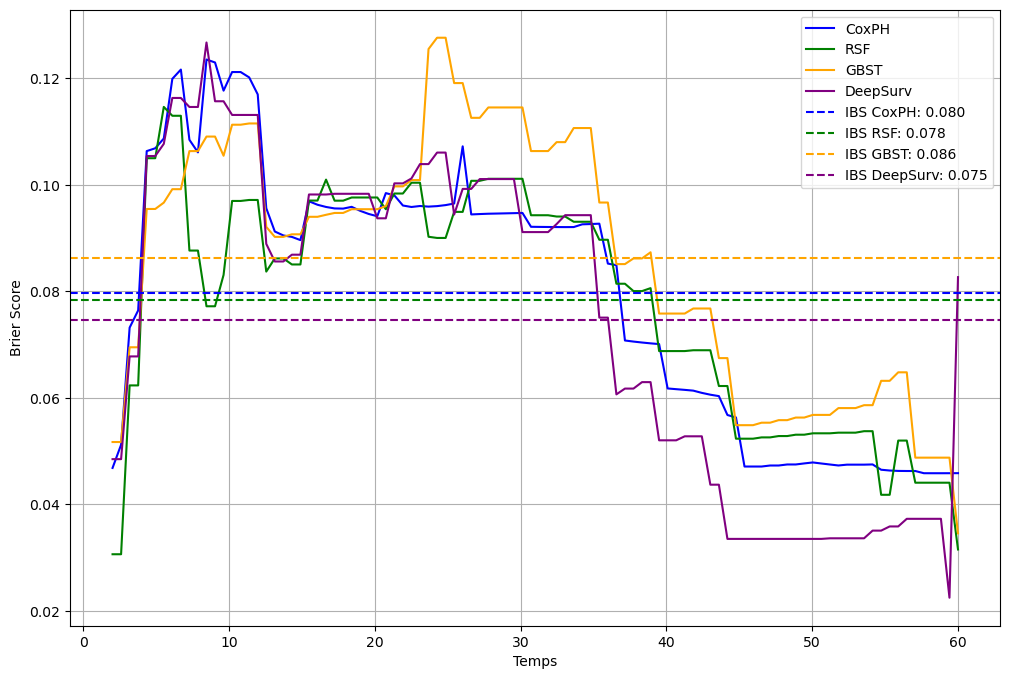

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que time_grid est la grille de temps utilisée pour l'évaluation
# et que brier_scores_cox, brier_scores_rsf, brier_scores_gbst, brier_scores_deepsurv
# sont les Brier Scores calculés pour chaque modèle à chaque instant de time_grid.

plt.figure(figsize=(12, 8))

# Courbes de Brier Score pour chaque modèle
plt.plot(time_grid, brier_scores_test_cox, label='CoxPH', color='blue')
plt.plot(time_grid, brier_scores_test_rsf, label='RSF', color='green')
plt.plot(time_grid, brier_scores_test_gbst, label='GBST', color='orange')
plt.plot(time_grid, brier_test_deepsurv, label='DeepSurv', color='purple')

# Lignes horizontales pour les IBS
plt.axhline(y=ibs_test_cox, color='blue', linestyle='--', label=f'IBS CoxPH: {ibs_test_cox:.3f}')
plt.axhline(y=ibs_test_rsf, color='green', linestyle='--', label=f'IBS RSF: {ibs_test_rsf:.3f}')
plt.axhline(y=ibs_test_gbst, color='orange', linestyle='--', label=f'IBS GBST: {ibs_test_gbst:.3f}')
plt.axhline(y=ibs_test_deepsurv, color='purple', linestyle='--', label=f'IBS DeepSurv: {ibs_test_deepsurv:.3f}')

plt.xlabel('Temps')
plt.ylabel('Brier Score')
#plt.title('Comparaison des Brier Scores en fonction du temps pour différents modèles de survie')
plt.legend()
plt.grid(True)
plt.show()

Les graphiques de l'Integrated Brier Score avaient montré une tendance claire : le modèle Deep Survival Models avait présenté les courbes les plus basses, traduisant ainsi une meilleure calibration et une prédiction plus précise au fil du temps. En comparaison, les autres modèles affichaient des valeurs légèrement supérieures, ce qui indiquait une performance prédictive moins optimale. Ces visualisations avaient confirmé les résultats globaux obtenus lors de l'évaluation des modèles.

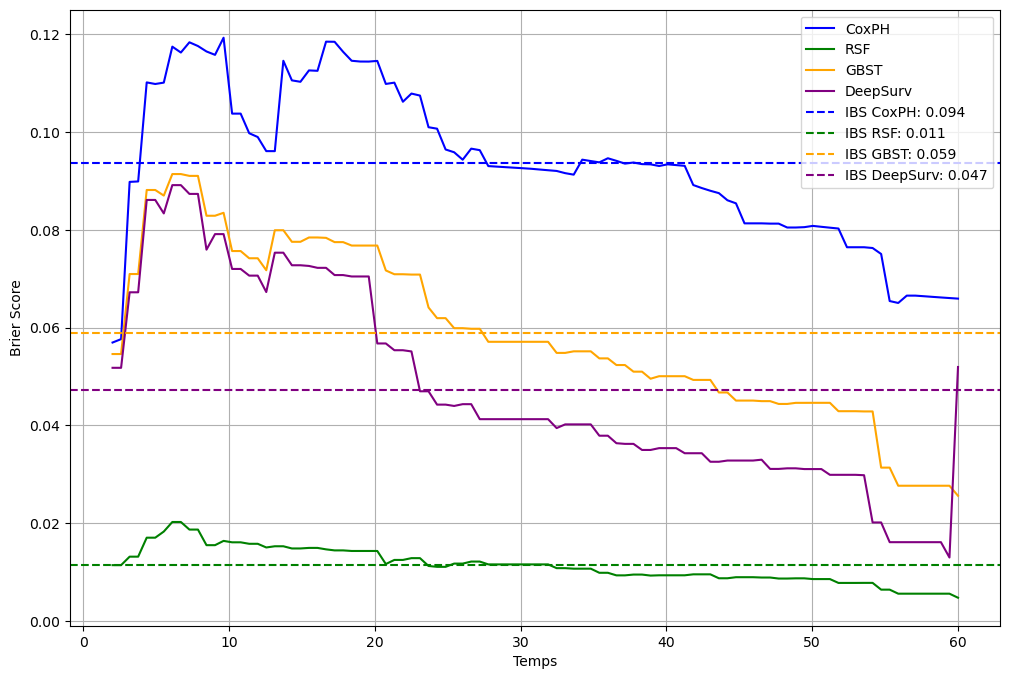

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que time_grid est la grille de temps utilisée pour l'évaluation
# et que brier_scores_cox, brier_scores_rsf, brier_scores_gbst, brier_scores_deepsurv
# sont les Brier Scores calculés pour chaque modèle à chaque instant de time_grid.

plt.figure(figsize=(12, 8))

# Courbes de Brier Score pour chaque modèle
plt.plot(time_grid, brier_scores_train_cox, label='CoxPH', color='blue')
plt.plot(time_grid, brier_scores_train_rsf, label='RSF', color='green')
plt.plot(time_grid, brier_scores_train_gbst, label='GBST', color='orange')
plt.plot(time_grid, brier_train_deepsurv, label='DeepSurv', color='purple')

# Lignes horizontales pour les IBS
plt.axhline(y=ibs_train_cox, color='blue', linestyle='--', label=f'IBS CoxPH: {ibs_train_cox:.3f}')
plt.axhline(y=ibs_train_rsf, color='green', linestyle='--', label=f'IBS RSF: {ibs_train_rsf:.3f}')
plt.axhline(y=ibs_train_gbst, color='orange', linestyle='--', label=f'IBS GBST: {ibs_train_gbst:.3f}')
plt.axhline(y=ibs_train_deepsurv, color='purple', linestyle='--', label=f'IBS DeepSurv: {ibs_train_deepsurv:.3f}')

plt.xlabel('Temps')
plt.ylabel('Brier Score')
#plt.title('Comparaison des Brier Scores en fonction du temps pour différents modèles de survie')
plt.legend()
plt.grid(True)
plt.show()

# **Deploiement des Modèles**
## **Sauvegarde du modèle**

In [59]:
import joblib
#Pour Cox Proportional Hazards
joblib.dump(cph, "coxph.pkl")
#Pour Random Survival Forest
joblib.dump(rsf, "rsf.pkl")
#Pour Gradient Boosting Survival Tree
joblib.dump(gbst, "gbst.pkl")
# Sauvegarde en format .keras
best_model.save("deepsurv.keras")